<a href="https://colab.research.google.com/github/Pervinsr/-Letter-Changes/blob/main/Pervin_Tez_DeneyselCalisma2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install install tensorflow==2.8.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 KB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 29.6 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.11.0
    Uninstalling keras-2.11.0:
      Successfully uninstalled keras-2.11.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.11.2
    Uninstalling tensorboard-2.11.2:
      Successfully uninstalled tensorboard-2.11.2
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.11.0
    Uninstalling tensorflow-2.11.0:
      Successfully uninstalled tensorflow-2.11.0


##PreTrained features extraction by VGG16

In [ ]:
import numpy as np
np.random.seed(123)  # for reproducibility
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
import pickle
from keras.layers import Convolution2D, MaxPooling2D	
from  keras.utils import np_utils
from matplotlib import pyplot as plt
from keras.datasets import mnist
import joblib
import pandas as pd
import os
from google.colab import drive
import numpy as np
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras import callbacks,optimizers
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.linear_model import Ridge

from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import scipy.misc
from keras.layers import Concatenate, Dense, LSTM, Input, concatenate
from keras import backend as K
from tensorflow.keras.utils import img_to_array
from skimage.transform import resize
import os
import joblib
from keras.layers import Flatten
from keras.models import Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.applications.vgg16 import VGG16

#Drive bağlama
drive.mount('/content/drive')
anaKlasor =  "/content/drive/MyDrive/tez/"
main_path=anaKlasor
label="VGG16"
model = VGG16(weights='imagenet')

#Verisetim
anaKlasor1=anaKlasor+'dataset_deneme/'
altKlasorler =  os.listdir(anaKlasor1)


anaKlasor=anaKlasor1
Features=[]
dosyaAdlari = []
Siniflar=[]

hedef_class=['non-COVID','COVID']

input_size=(224,224,3)

altKlasorler =  os.listdir(anaKlasor)
for index, altKlasor in enumerate(altKlasorler):
  print ("Kategori:",altKlasor)

  yol=anaKlasor+altKlasor
  goruntuler=os.listdir(yol)
  for goruntu in goruntuler:
    print (yol+'/'+goruntu)

    img = image.load_img(os.path.join(anaKlasor,altKlasor,goruntu), target_size=input_size)
    
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    xx = model.predict(x)

    Features.append(xx)
    print(label,"Index:",hedef_class.index(altKlasor),altKlasor,xx.shape)
    
    Siniflar.append(hedef_class.index(altKlasor))

Features=np.array(Features)
np.save(main_path+"/pretrained_features/"+label+"_features.npy",Features)
np.save(main_path+"/pretrained_features/"+label+"_output.npy",Siniflar)
print (main_path)
print (Siniflar)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Kategori: COVID
/content/drive/MyDrive/tez/dataset_deneme/COVID/Covid (1233).png
VGG16 Index: 1 COVID (1, 1000)
/content/drive/MyDrive/tez/dataset_deneme/COVID/Covid (156).png
VGG16 Index: 1 COVID (1, 1000)
/content/drive/MyDrive/tez/dataset_deneme/COVID/Covid (266).png
VGG16 Index: 1 COVID (1, 1000)
/content/drive/MyDrive/tez/dataset_deneme/COVID/Covid (221).png
VGG16 Index: 1 COVID (1, 1000)
/content/drive/MyDrive/tez/dataset_deneme/COVID/Covid (151).png
VGG16 Index: 1 COVID (1, 1000)
/content/drive/MyDrive/tez/dataset_deneme/COVID/Covid (258).png
VGG16 Index: 1 COVID (1, 1000)
/content/drive/MyDrive/tez/dataset_deneme/COVID/Covid (268).png
VGG16 Index: 1 COVID (1, 1000)
/content/drive/MyDrive/tez/dataset_deneme/COVID/Covid (205).png
VGG16 Index: 1 COVID (1, 1000)
/content/drive/MyDrive/tez/dataset_deneme/COVID/Covid (160).png
VGG16 Index: 1 COVID (1, 1000)

##Transfer Learning Features Classification

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(2481, 1, 1000)
Bilgi: (1984, 1000) 1984
Acc VGG16-SVM score: 73.6
Confusion Matrix:
[[179  67]
 [ 64 187]]
by SVM  Algoritması  VGG16  Dataset, Acc: 73.64 Sen: 74.5  Spe: 72.76  Pre: 73.62  F1-score: 74.06


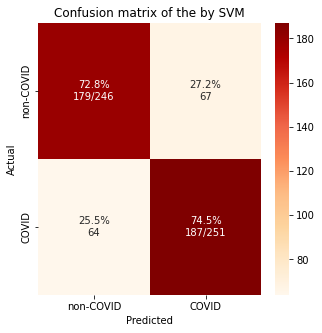

Bilgi: (1984, 1000) 1984
Acc VGG16-LR score: 69.39999999999999
Confusion Matrix:
[[166  80]
 [ 72 179]]
by LR  Algoritması  VGG16  Dataset, Acc: 69.42 Sen: 71.31  Spe: 67.48  Pre: 69.11  F1-score: 70.19


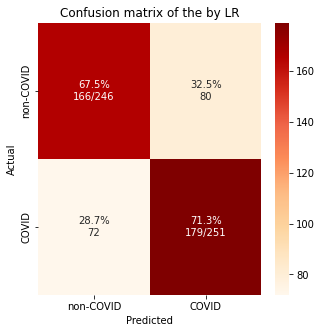

Bilgi: (1984, 1000) 1984
Acc VGG16-XGBoost score: 88.1
Confusion Matrix:
[[222  24]
 [ 35 216]]
by XGBoost  Algoritması  VGG16  Dataset, Acc: 88.13 Sen: 86.06  Spe: 90.24  Pre: 90.0  F1-score: 87.99


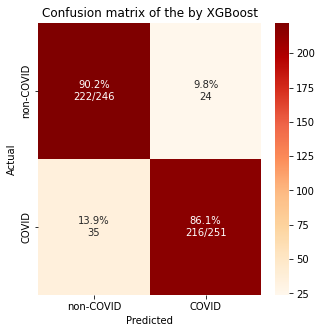

Bilgi: (1984, 1000) 1984
Acc VGG16-GradientBoost score: 84.3
Confusion Matrix:
[[215  31]
 [ 47 204]]
by GradientBoost  Algoritması  VGG16  Dataset, Acc: 84.31 Sen: 81.27  Spe: 87.4  Pre: 86.81  F1-score: 83.95


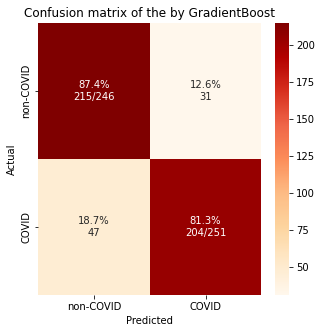

Bilgi: (1984, 1000) 1984
Acc VGG16-KNN score: 68.4
Confusion Matrix:
[[162  84]
 [ 73 178]]
by KNN  Algoritması  VGG16  Dataset, Acc: 68.41 Sen: 70.92  Spe: 65.85  Pre: 67.94  F1-score: 69.4


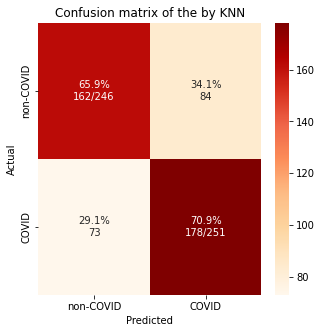

Bilgi: (1984, 1000) 1984
Acc VGG16-RandomForest score: 83.3
Confusion Matrix:
[[211  35]
 [ 48 203]]
by RandomForest  Algoritması  VGG16  Dataset, Acc: 83.3 Sen: 80.88  Spe: 85.77  Pre: 85.29  F1-score: 83.03


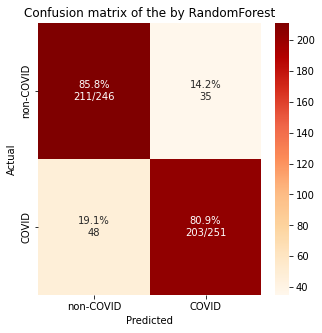

##########################


In [ ]:
from google.colab import drive
import numpy as np
from imblearn.over_sampling import SMOTE,RandomOverSampler
from imblearn.combine import SMOTETomek
import pickle
import warnings
from collections import Counter
from numpy import where
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import joblib
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import img_to_array
from skimage.transform import resize
import os
import joblib
from keras.layers import Flatten
from keras.models import Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.applications.vgg16 import VGG16

basarilar=[]

def perf_measure(cm,alg_name,etiket):
    
    print ("Confusion Matrix:")
    print (cm)
    TN = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TP = cm[1][1]
    
    acc= round(float(TP+TN)/(TP+TN+FP+FN)*100,2)
    sensitivity = round(float(TP) / (TP + FN)*100,2)
    specificity =round(float(TN )/ (FP + TN)*100,2)
    precision=round(float(TP )/ (TP + FP)*100,2)
    F1_score=round(2/((1/sensitivity)+(1/precision)),2)
    print (alg_name," Algoritması ",etiket," Dataset, Acc:",acc, "Sen:",sensitivity," Spe:",specificity," Pre:",precision," F1-score:",F1_score)
    basarilar.append([alg_name,etiket,acc,sensitivity,specificity,precision,F1_score])

def cm_analysis(y_true, y_pred,etiket, labels, alg_name,figsize2=(5,5)):

    cm = confusion_matrix(y_true, y_pred, labels=labels)
    perf_measure(cm,alg_name,etiket)

    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)

    labels2=['non-COVID','COVID']
    
    cm = pd.DataFrame(cm, index=labels2, columns=labels2)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize2)
    sns.heatmap(cm, cmap="OrRd",annot=annot, fmt='', ax=ax)
    #plt.savefig(filename)
    plt.title('Confusion matrix of the '+alg_name)
    plt.show()

def class_bilgi(y,etiket):
    print (etiket, "bilgisi")
    t=0
    for class_code in range(0,7):
        s=0
        for value in y:
            if value==class_code:
                s+=1
                
        print ("Class no:",class_code," sayısı:",s)
        t+=s
    
    print ("Toplam:",t)

warnings.filterwarnings("ignore")

def plot_ciz(X_new,y_new,counter):
  # scatter plot of examples by class label
  for label, _ in counter.items():
    row_ix = where(y_new == label)[0]
    pyplot.scatter(X_new[row_ix, 0], X_new[row_ix, 1], label=str(label))
  pyplot.legend()
  pyplot.show()



def func_siniflandir(x_train,y_train,x_test,y_test,etiket):
    
    labels=[0,1]    
    alg_lists=['SVM','LR','XGBoost','GradientBoost','KNN','RandomForest']

    for i,clf in enumerate([svm.SVC(),LogisticRegression(), XGBClassifier(), GradientBoostingClassifier(),KNeighborsClassifier(),RandomForestClassifier()]):
      print ("Bilgi:",x_train.shape,len(y_train))

      clf.fit(x_train,y_train)
      results = clf.predict(x_test)
      acc=round(accuracy_score(y_test, results),3)
      print ("Acc "+etiket+"-"+alg_lists[i]+ " score:",acc*100)
      #joblib.dump(clf,anaKlasor+"/pretrained_features/"+etiket+".pkl")
      cm_analysis(y_test, results, etiket,labels, "by "+alg_lists[i],figsize2=(5,5))


drive.mount('/content/drive')
main_path =  "/content/drive/MyDrive/tez/"
label="VGG16"

etiket="VGG16"
X=np.load(main_path+"/pretrained_features/"+label+"_features.npy")
y=np.load(main_path+"/pretrained_features/"+label+"_output.npy")
print (X.shape)

#X=X.reshape(X.shape[2])
X = X.reshape(X.shape[0], -1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state=42)

func_siniflandir(x_train,y_train,x_test,y_test,etiket)
#plot_ciz(X, y,counter)
print ("#########################")

#özgün çalışma

In [ ]:
label="VGG16"
X_VGG16=np.load(main_path+"/pretrained_features/"+label+"_features.npy")

label="ResNet50"
X_ResNet50=np.load(main_path+"/pretrained_features/"+label+"_features.npy")

label="EfficientNetB0"
X_EfficientNetB0=np.load(main_path+"/pretrained_features/"+label+"_features.npy")


X=np.concatenate((X_VGG16,X_ResNet50, X_EfficientNetB0),axis=1)
y=np.load(main_path+"/pretrained_features/"+label+"_output.npy")
print(X_VGG16)
print("##################")
print(X_ResNet50)
print("##################")
print(X_EfficientNetB0)

[[[3.1724590e-05 1.5024758e-05 7.3267853e-05 ... 8.0955855e-05
   3.0621668e-05 3.4159750e-02]]

 [[7.3126080e-06 3.5731253e-05 4.3132070e-05 ... 1.0092622e-05
   3.2161131e-06 3.9931792e-01]]

 [[1.4987749e-06 6.5959524e-05 3.3338252e-05 ... 1.2371894e-06
   1.1265344e-05 5.9924906e-01]]

 ...

 [[2.3396571e-05 2.8135846e-04 1.4564807e-04 ... 1.6004375e-05
   4.0620267e-05 3.7187289e-02]]

 [[4.3445498e-06 8.7635772e-06 5.2932169e-06 ... 2.3801844e-05
   2.6066626e-05 4.8032999e-02]]

 [[1.6416750e-05 1.9374538e-04 1.8943811e-05 ... 6.0765678e-06
   2.7588225e-05 1.9722998e-02]]]
##################
[[[1.8580509e-05 3.1611064e-05 1.3110245e-04 ... 3.3595516e-05
   6.2810282e-06 5.5385340e-02]]

 [[2.2115544e-05 2.9389006e-05 5.2057749e-05 ... 1.1825621e-06
   2.1438800e-05 5.7123592e-03]]

 [[2.3230708e-05 2.8471084e-05 2.7672827e-04 ... 3.0245087e-07
   1.7277564e-05 2.1789677e-02]]

 ...

 [[2.4247638e-05 2.4738711e-05 4.3010903e-05 ... 1.5289714e-07
   2.6018583e-05 4.8979940e-03]]


# PreTrained features extraction by RESNET50

In [ ]:
import numpy as np
np.random.seed(123)  # for reproducibility
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
import pickle
from keras.layers import Convolution2D, MaxPooling2D	
from  keras.utils import np_utils
from matplotlib import pyplot as plt
from keras.datasets import mnist
import joblib
import pandas as pd
import os
from google.colab import drive
import numpy as np
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras import callbacks,optimizers
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.linear_model import Ridge

from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import scipy.misc
from keras.layers import Concatenate, Dense, LSTM, Input, concatenate
from keras import backend as K
from tensorflow.keras.utils import img_to_array
from skimage.transform import resize
import os
import joblib
from keras.layers import Flatten
from keras.models import Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from tensorflow.keras.applications import ResNet50

#Drive bağlama
drive.mount('/content/drive')
anaKlasor =  "/content/drive/MyDrive/tez/"

label="ResNet50"
model = ResNet50(weights='imagenet')

#Verisetim
anaKlasor1=anaKlasor+'dataset_deneme/'
altKlasorler =  os.listdir(anaKlasor1)

anaKlasor=anaKlasor1
Features=[]
dosyaAdlari = []
Siniflar=[]

hedef_class=['non-COVID','COVID']

input_size=(224,224,3)

altKlasorler =  os.listdir(anaKlasor)
for index, altKlasor in enumerate(altKlasorler):
  print ("Kategori:",altKlasor)

  yol=anaKlasor+altKlasor
  goruntuler=os.listdir(yol)
  for goruntu in goruntuler:
    print (yol+'/'+goruntu)

    img = image.load_img(os.path.join(anaKlasor,altKlasor,goruntu), target_size=input_size)
    
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    xx = model.predict(x)

    Features.append(xx)
    print(label,"Index:",hedef_class.index(altKlasor),altKlasor,xx.shape)
    
    Siniflar.append(hedef_class.index(altKlasor))

Features=np.array(Features)
np.save(main_path+"/pretrained_features/"+label+"_features.npy",Features)
np.save(main_path+"/pretrained_features/"+label+"_output.npy",Siniflar)
print (main_path)
print (Siniflar)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
102981632/102967424 [==============================] - 3s 0us/step
Kategori: COVID
/content/drive/MyDrive/tez/dataset_deneme/COVID/Covid (1233).png
ResNet50 Index: 1 COVID (1, 1000)
/content/drive/MyDrive/tez/dataset_deneme/COVID/Covid (156).png
ResNet50 Index: 1 COVID (1, 1000)
/content/drive/MyDrive/tez/dataset_deneme/COVID/Covid (266).png
ResNet50 Index: 1 COVID (1, 1000)
/content/drive/MyDrive/tez/dataset_deneme/COVID/Covid (221).png
ResNet50 Index: 1 COVID (1, 1000)
/content/drive/MyDrive/tez/dataset_deneme/COVID/Covid (151).png
ResNet50 Index: 1 COVID (1, 1000)
/content/drive/MyDrive/tez/dataset_deneme/COVID/Covid (258).png
ResNet50 Index: 1 COVID (1, 1000)
/content/drive/MyDrive/tez/dataset_deneme/COVID/Covid (268).png
ResNet50 Index: 1 COVID (1, 1000)
/content/drive/MyDrive/tez/dataset_deneme/COVID/Covid (205).png
ResNet50 Index: 1 COVID (1, 1000)
/co

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(2481, 1, 1000)
Bilgi: (1984, 1000) 1984
Acc ResNet50-SVM score: 80.5
Confusion Matrix:
[[214  32]
 [ 65 186]]
by SVM  Algoritması  ResNet50  Dataset, Acc: 80.48 Sen: 74.1  Spe: 86.99  Pre: 85.32  F1-score: 79.32


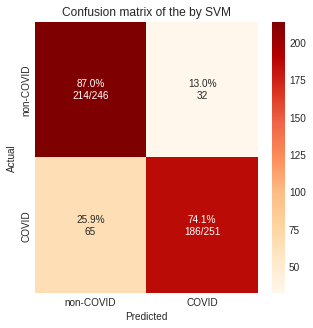

Bilgi: (1984, 1000) 1984
Acc ResNet50-LR score: 68.2
Confusion Matrix:
[[189  57]
 [101 150]]
by LR  Algoritması  ResNet50  Dataset, Acc: 68.21 Sen: 59.76  Spe: 76.83  Pre: 72.46  F1-score: 65.5


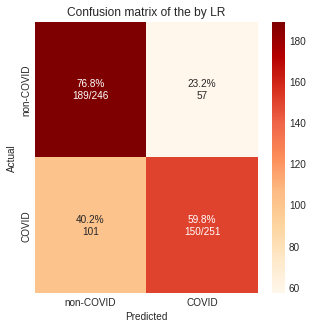

Bilgi: (1984, 1000) 1984
Acc ResNet50-XGBoost score: 90.9
Confusion Matrix:
[[227  19]
 [ 26 225]]
by XGBoost  Algoritması  ResNet50  Dataset, Acc: 90.95 Sen: 89.64  Spe: 92.28  Pre: 92.21  F1-score: 90.91


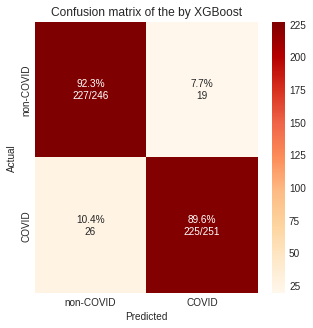

Bilgi: (1984, 1000) 1984
Acc ResNet50-GradientBoost score: 88.7
Confusion Matrix:
[[224  22]
 [ 34 217]]
by GradientBoost  Algoritması  ResNet50  Dataset, Acc: 88.73 Sen: 86.45  Spe: 91.06  Pre: 90.79  F1-score: 88.57


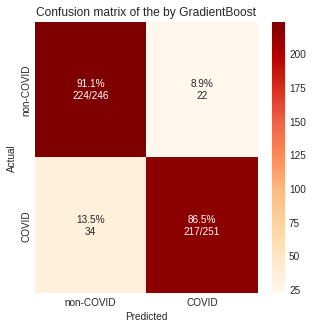

Bilgi: (1984, 1000) 1984
Acc ResNet50-KNN score: 68.60000000000001
Confusion Matrix:
[[186  60]
 [ 96 155]]
by KNN  Algoritması  ResNet50  Dataset, Acc: 68.61 Sen: 61.75  Spe: 75.61  Pre: 72.09  F1-score: 66.52


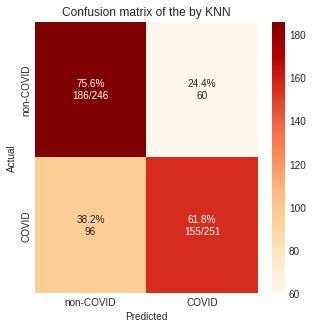

Bilgi: (1984, 1000) 1984
Acc ResNet50-RandomForest score: 87.7
Confusion Matrix:
[[220  26]
 [ 35 216]]
by RandomForest  Algoritması  ResNet50  Dataset, Acc: 87.73 Sen: 86.06  Spe: 89.43  Pre: 89.26  F1-score: 87.63


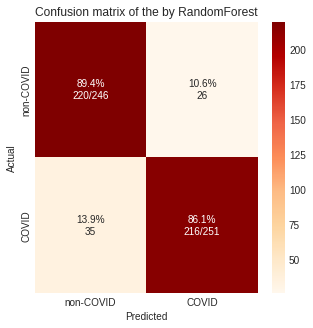

##########################


In [ ]:
from google.colab import drive
import numpy as np
from imblearn.over_sampling import SMOTE,RandomOverSampler
from imblearn.combine import SMOTETomek
import pickle
import warnings
from collections import Counter
from numpy import where
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import joblib
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

basarilar=[]

def perf_measure(cm,alg_name,etiket):
    
    print ("Confusion Matrix:")
    print (cm)
    TN = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TP = cm[1][1]
    
    acc= round(float(TP+TN)/(TP+TN+FP+FN)*100,2)
    sensitivity = round(float(TP) / (TP + FN)*100,2)
    specificity =round(float(TN )/ (FP + TN)*100,2)
    precision=round(float(TP )/ (TP + FP)*100,2)
    F1_score=round(2/((1/sensitivity)+(1/precision)),2)
    print (alg_name," Algoritması ",etiket," Dataset, Acc:",acc, "Sen:",sensitivity," Spe:",specificity," Pre:",precision," F1-score:",F1_score)
    basarilar.append([alg_name,etiket,acc,sensitivity,specificity,precision,F1_score])

def cm_analysis(y_true, y_pred,etiket, labels, alg_name,figsize2=(5,5)):

    cm = confusion_matrix(y_true, y_pred, labels=labels)
    perf_measure(cm,alg_name,etiket)

    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)

    labels2=['non-COVID','COVID']
    
    cm = pd.DataFrame(cm, index=labels2, columns=labels2)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize2)
    sns.heatmap(cm, cmap="OrRd",annot=annot, fmt='', ax=ax)
    #plt.savefig(filename)
    plt.title('Confusion matrix of the '+alg_name)
    plt.show()

def class_bilgi(y,etiket):
    print (etiket, "bilgisi")
    t=0
    for class_code in range(0,7):
        s=0
        for value in y:
            if value==class_code:
                s+=1
                
        print ("Class no:",class_code," sayısı:",s)
        t+=s
    
    print ("Toplam:",t)

warnings.filterwarnings("ignore")

def plot_ciz(X_new,y_new,counter):
  # scatter plot of examples by class label
  for label, _ in counter.items():
    row_ix = where(y_new == label)[0]
    pyplot.scatter(X_new[row_ix, 0], X_new[row_ix, 1], label=str(label))
  pyplot.legend()
  pyplot.show()



def func_siniflandir(x_train,y_train,x_test,y_test,etiket):
    
    labels=[0,1]    
    alg_lists=['SVM','LR','XGBoost','GradientBoost','KNN','RandomForest']

    for i,clf in enumerate([svm.SVC(),LogisticRegression(), XGBClassifier(), GradientBoostingClassifier(),KNeighborsClassifier(),RandomForestClassifier()]):
      print ("Bilgi:",x_train.shape,len(y_train))

      clf.fit(x_train,y_train)
      results = clf.predict(x_test)
      acc=round(accuracy_score(y_test, results),3)
      print ("Acc "+etiket+"-"+alg_lists[i]+ " score:",acc*100)
      #joblib.dump(clf,anaKlasor+"/pretrained_features/"+etiket+".pkl")
      cm_analysis(y_test, results, etiket,labels, "by "+alg_lists[i],figsize2=(5,5))


drive.mount('/content/drive')
main_path =  "/content/drive/MyDrive/tez/"
label="ResNet50"

etiket="ResNet50"
X=np.load(main_path+"/pretrained_features/"+label+"_features.npy")
y=np.load(main_path+"/pretrained_features/"+label+"_output.npy")
print (X.shape)

#X=X.reshape(X.shape[2])
X = X.reshape(X.shape[0], -1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state=42)

func_siniflandir(x_train,y_train,x_test,y_test,etiket)
#plot_ciz(X, y,counter)
print ("##########################")

In [ ]:
X=np.concatenate((VGG16, ResNet50),axis=1)
y=np.load(main_path+"/features/"+label+"_output.npy")

# PreTrained features extraction by Inception

In [ ]:
import numpy as np
np.random.seed(123)  # for reproducibility
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
import pickle
from keras.layers import Convolution2D, MaxPooling2D	
from  keras.utils import np_utils
from matplotlib import pyplot as plt
from keras.datasets import mnist
import joblib
import pandas as pd
import os
from google.colab import drive
import numpy as np
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras import callbacks,optimizers
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.linear_model import Ridge

from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import scipy.misc
from keras.layers import Concatenate, Dense, LSTM, Input, concatenate
from keras import backend as K
from tensorflow.keras.utils import img_to_array
from skimage.transform import resize
import os
import joblib
from keras.layers import Flatten
from keras.models import Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from tensorflow.keras.applications import InceptionV3

#Drive bağlama
drive.mount('/content/drive')
anaKlasor =  "/content/drive/MyDrive/tez/"

label="InceptionV3"
model = InceptionV3(weights='imagenet')

#Verisetim
anaKlasor1=anaKlasor+'dataset_deneme/'
altKlasorler =  os.listdir(anaKlasor1)

anaKlasor=anaKlasor1
Features=[]
dosyaAdlari = []
Siniflar=[]

hedef_class=['non-COVID','COVID']

input_size=(299,299,3)

altKlasorler =  os.listdir(anaKlasor)
for index, altKlasor in enumerate(altKlasorler):
  print ("Kategori:",altKlasor)

  yol=anaKlasor+altKlasor
  goruntuler=os.listdir(yol)
  for goruntu in goruntuler:
    print (yol+'/'+goruntu)

    img = image.load_img(os.path.join(anaKlasor,altKlasor,goruntu), target_size=input_size)
    
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    xx = model.predict(x)

    Features.append(xx)
    print(label,"Index:",hedef_class.index(altKlasor),altKlasor,xx.shape)
    
    Siniflar.append(hedef_class.index(altKlasor))

Features=np.array(Features)
np.save(main_path+"/pretrained_features/"+label+"_features.npy",Features)
np.save(main_path+"/pretrained_features/"+label+"_output.npy",Siniflar)
print (main_path)
print (Siniflar)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Kategori: COVID
/content/drive/MyDrive/tez/dataset_deneme/COVID/Covid (1233).png
InceptionV3 Index: 1 COVID (1, 1000)
/content/drive/MyDrive/tez/dataset_deneme/COVID/Covid (156).png
InceptionV3 Index: 1 COVID (1, 1000)
/content/drive/MyDrive/tez/dataset_deneme/COVID/Covid (266).png
InceptionV3 Index: 1 COVID (1, 1000)
/content/drive/MyDrive/tez/dataset_deneme/COVID/Covid (221).png
InceptionV3 Index: 1 COVID (1, 1000)
/content/drive/MyDrive/tez/dataset_deneme/COVID/Covid (151).png
InceptionV3 Index: 1 COVID (1, 1000)
/content/drive/MyDrive/tez/dataset_deneme/COVID/Covid (258).png
InceptionV3 Index: 1 COVID (1, 1000)
/content/drive/MyDrive/tez/dataset_deneme/COVID/Covid (268).png
InceptionV3 Index: 1 COVID (1, 1000)
/content/drive/MyDrive/tez/dataset_deneme/COVID/Covid (205).png
InceptionV3 Index: 1 COVID (1, 1000)
/content/drive/MyDrive/tez/dataset_deneme/COVI

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(2481, 1, 1000)
Bilgi: (1984, 1000) 1984
Acc InceptionV3-SVM score: 67.60000000000001
Confusion Matrix:
[[203  43]
 [118 133]]
by SVM  Algoritması  InceptionV3  Dataset, Acc: 67.61 Sen: 52.99  Spe: 82.52  Pre: 75.57  F1-score: 62.3


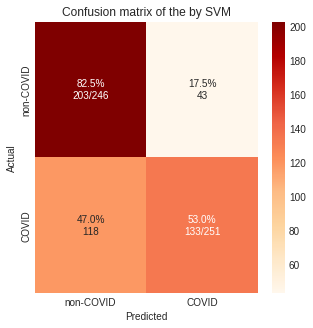

Bilgi: (1984, 1000) 1984
Acc InceptionV3-LR score: 67.2
Confusion Matrix:
[[195  51]
 [112 139]]
by LR  Algoritması  InceptionV3  Dataset, Acc: 67.2 Sen: 55.38  Spe: 79.27  Pre: 73.16  F1-score: 63.04


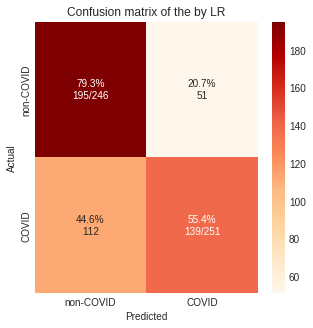

Bilgi: (1984, 1000) 1984
Acc InceptionV3-XGBoost score: 86.7
Confusion Matrix:
[[212  34]
 [ 32 219]]
by XGBoost  Algoritması  InceptionV3  Dataset, Acc: 86.72 Sen: 87.25  Spe: 86.18  Pre: 86.56  F1-score: 86.9


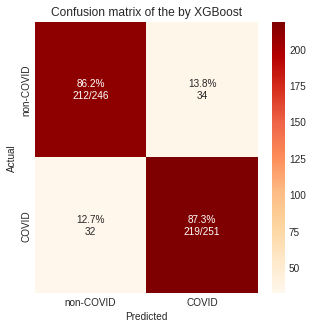

Bilgi: (1984, 1000) 1984
Acc InceptionV3-GradientBoost score: 73.8
Confusion Matrix:
[[199  47]
 [ 83 168]]
by GradientBoost  Algoritması  InceptionV3  Dataset, Acc: 73.84 Sen: 66.93  Spe: 80.89  Pre: 78.14  F1-score: 72.1


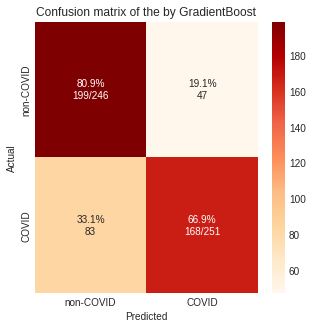

Bilgi: (1984, 1000) 1984
Acc InceptionV3-KNN score: 69.0
Confusion Matrix:
[[194  52]
 [102 149]]
by KNN  Algoritması  InceptionV3  Dataset, Acc: 69.01 Sen: 59.36  Spe: 78.86  Pre: 74.13  F1-score: 65.93


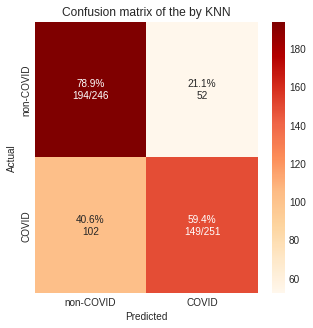

Bilgi: (1984, 1000) 1984
Acc InceptionV3-RandomForest score: 74.0
Confusion Matrix:
[[199  47]
 [ 82 169]]
by RandomForest  Algoritması  InceptionV3  Dataset, Acc: 74.04 Sen: 67.33  Spe: 80.89  Pre: 78.24  F1-score: 72.38


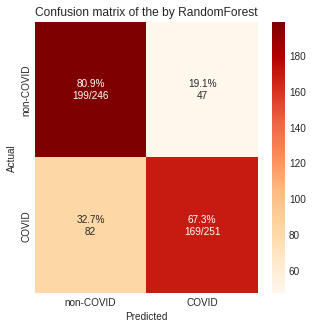

##########################


In [ ]:
from google.colab import drive
import numpy as np
from imblearn.over_sampling import SMOTE,RandomOverSampler
from imblearn.combine import SMOTETomek
import pickle
import warnings
from collections import Counter
from numpy import where
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import joblib
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

basarilar=[]

def perf_measure(cm,alg_name,etiket):
    
    print ("Confusion Matrix:")
    print (cm)
    TN = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TP = cm[1][1]
    
    acc= round(float(TP+TN)/(TP+TN+FP+FN)*100,2)
    sensitivity = round(float(TP) / (TP + FN)*100,2)
    specificity =round(float(TN )/ (FP + TN)*100,2)
    precision=round(float(TP )/ (TP + FP)*100,2)
    F1_score=round(2/((1/sensitivity)+(1/precision)),2)
    print (alg_name," Algoritması ",etiket," Dataset, Acc:",acc, "Sen:",sensitivity," Spe:",specificity," Pre:",precision," F1-score:",F1_score)
    basarilar.append([alg_name,etiket,acc,sensitivity,specificity,precision,F1_score])

def cm_analysis(y_true, y_pred,etiket, labels, alg_name,figsize2=(5,5)):

    cm = confusion_matrix(y_true, y_pred, labels=labels)
    perf_measure(cm,alg_name,etiket)

    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)

    labels2=['non-COVID','COVID']
    
    cm = pd.DataFrame(cm, index=labels2, columns=labels2)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize2)
    sns.heatmap(cm, cmap="OrRd",annot=annot, fmt='', ax=ax)
    #plt.savefig(filename)
    plt.title('Confusion matrix of the '+alg_name)
    plt.show()

def class_bilgi(y,etiket):
    print (etiket, "bilgisi")
    t=0
    for class_code in range(0,7):
        s=0
        for value in y:
            if value==class_code:
                s+=1
                
        print ("Class no:",class_code," sayısı:",s)
        t+=s
    
    print ("Toplam:",t)

warnings.filterwarnings("ignore")

def plot_ciz(X_new,y_new,counter):
  # scatter plot of examples by class label
  for label, _ in counter.items():
    row_ix = where(y_new == label)[0]
    pyplot.scatter(X_new[row_ix, 0], X_new[row_ix, 1], label=str(label))
  pyplot.legend()
  pyplot.show()



def func_siniflandir(x_train,y_train,x_test,y_test,etiket):
    
    labels=[0,1]    
    alg_lists=['SVM','LR','XGBoost','GradientBoost','KNN','RandomForest']

    for i,clf in enumerate([svm.SVC(),LogisticRegression(), XGBClassifier(), GradientBoostingClassifier(),KNeighborsClassifier(),RandomForestClassifier()]):
      print ("Bilgi:",x_train.shape,len(y_train))

      clf.fit(x_train,y_train)
      results = clf.predict(x_test)
      acc=round(accuracy_score(y_test, results),3)
      print ("Acc "+etiket+"-"+alg_lists[i]+ " score:",acc*100)
      #joblib.dump(clf,anaKlasor+"/pretrained_features/"+etiket+".pkl")
      cm_analysis(y_test, results, etiket,labels, "by "+alg_lists[i],figsize2=(5,5))


drive.mount('/content/drive')
main_path =  "/content/drive/MyDrive/tez/"
label="InceptionV3"

etiket="InceptionV3"
X=np.load(main_path+"/pretrained_features/"+label+"_features.npy")
y=np.load(main_path+"/pretrained_features/"+label+"_output.npy")
print (X.shape)

#X=X.reshape(X.shape[2])
X = X.reshape(X.shape[0], -1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state=42)

func_siniflandir(x_train,y_train,x_test,y_test,etiket)
#plot_ciz(X, y,counter)
print ("##########################")

In [ ]:
X=np.concatenate((x_vgg16,x_vgg19),axis=1)
y=np.load(main_path+"/features/"+label+"_output.npy")

# PreTrained features extraction by EfficientNet B0 

In [ ]:
import numpy as np
np.random.seed(123)  # for reproducibility
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
import pickle
from keras.layers import Convolution2D, MaxPooling2D	
from  keras.utils import np_utils
from matplotlib import pyplot as plt
from keras.datasets import mnist
import joblib
import pandas as pd
import os
from google.colab import drive
import numpy as np
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras import callbacks,optimizers
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.linear_model import Ridge

from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import scipy.misc
from keras.layers import Concatenate, Dense, LSTM, Input, concatenate
from keras import backend as K
from tensorflow.keras.utils import img_to_array
from skimage.transform import resize
import os
import joblib
from keras.layers import Flatten
from keras.models import Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from tensorflow.keras.applications import EfficientNetB0

#Drive bağlama
drive.mount('/content/drive')
anaKlasor =  "/content/drive/MyDrive/tez/"

label="EfficientNetB0"
model = EfficientNetB0(weights='imagenet')

#Verisetim
anaKlasor1=anaKlasor+'dataset_deneme/'
altKlasorler =  os.listdir(anaKlasor1)

anaKlasor=anaKlasor1
Features=[]
dosyaAdlari = []
Siniflar=[]

hedef_class=['non-COVID','COVID']

input_size=(224,224,3)

altKlasorler =  os.listdir(anaKlasor)
for index, altKlasor in enumerate(altKlasorler):
  print ("Kategori:",altKlasor)

  yol=anaKlasor+altKlasor
  goruntuler=os.listdir(yol)
  for goruntu in goruntuler:
    print (yol+'/'+goruntu)

    img = image.load_img(os.path.join(anaKlasor,altKlasor,goruntu), target_size=input_size)
    
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    xx = model.predict(x)

    Features.append(xx)
    print(label,"Index:",hedef_class.index(altKlasor),altKlasor,xx.shape)
    
    Siniflar.append(hedef_class.index(altKlasor))

Features=np.array(Features)
np.save(main_path+"/pretrained_features/"+label+"_features.npy",Features)
np.save(main_path+"/pretrained_features/"+label+"_output.npy",Siniflar)
print (main_path)
print (Siniflar)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
21848064/21834768 [==============================] - 1s 0us/step
Kategori: COVID
/content/drive/MyDrive/tez/dataset_deneme/COVID/Covid (1233).png
EfficientNetB0 Index: 1 COVID (1, 1000)
/content/drive/MyDrive/tez/dataset_deneme/COVID/Covid (156).png
EfficientNetB0 Index: 1 COVID (1, 1000)
/content/drive/MyDrive/tez/dataset_deneme/COVID/Covid (266).png
EfficientNetB0 Index: 1 COVID (1, 1000)
/content/drive/MyDrive/tez/dataset_deneme/COVID/Covid (221).png
EfficientNetB0 Index: 1 COVID (1, 1000)
/content/drive/MyDrive/tez/dataset_deneme/COVID/Covid (151).png
EfficientNetB0 Index: 1 COVID (1, 1000)
/content/drive/MyDrive/tez/dataset_deneme/COVID/Covid (258).png
EfficientNetB0 Index: 1 COVID (1, 1000)
/content/drive/MyDrive/tez/dataset_deneme/COVID/Covid (268).png
EfficientNetB0 Index: 1 COVID (1, 1000)
/content/drive/MyDrive/tez/dataset_deneme/COVID/Covid (205).p

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(2481, 1, 1000)
Bilgi: (1984, 1000) 1984
Acc EfficientNetB0-SVM score: 70.0
Confusion Matrix:
[[175  71]
 [ 78 173]]
by SVM  Algoritması  EfficientNetB0  Dataset, Acc: 70.02 Sen: 68.92  Spe: 71.14  Pre: 70.9  F1-score: 69.9


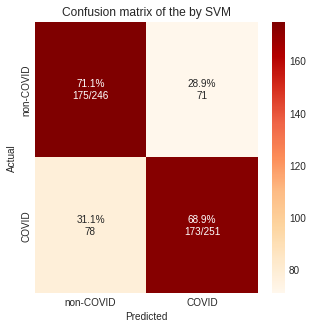

Bilgi: (1984, 1000) 1984
Acc EfficientNetB0-LR score: 66.0
Confusion Matrix:
[[152  94]
 [ 75 176]]
by LR  Algoritması  EfficientNetB0  Dataset, Acc: 66.0 Sen: 70.12  Spe: 61.79  Pre: 65.19  F1-score: 67.57


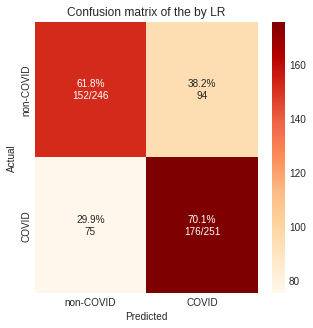

Bilgi: (1984, 1000) 1984
Acc EfficientNetB0-XGBoost score: 91.10000000000001
Confusion Matrix:
[[232  14]
 [ 30 221]]
by XGBoost  Algoritması  EfficientNetB0  Dataset, Acc: 91.15 Sen: 88.05  Spe: 94.31  Pre: 94.04  F1-score: 90.95


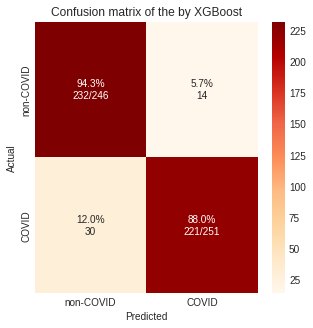

Bilgi: (1984, 1000) 1984
Acc EfficientNetB0-GradientBoost score: 90.3
Confusion Matrix:
[[228  18]
 [ 30 221]]
by GradientBoost  Algoritması  EfficientNetB0  Dataset, Acc: 90.34 Sen: 88.05  Spe: 92.68  Pre: 92.47  F1-score: 90.21


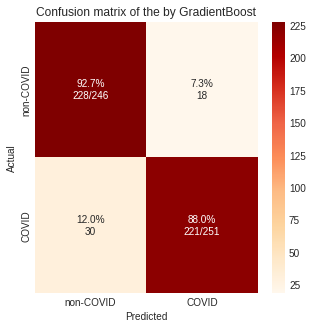

Bilgi: (1984, 1000) 1984
Acc EfficientNetB0-KNN score: 66.2
Confusion Matrix:
[[166  80]
 [ 88 163]]
by KNN  Algoritması  EfficientNetB0  Dataset, Acc: 66.2 Sen: 64.94  Spe: 67.48  Pre: 67.08  F1-score: 65.99


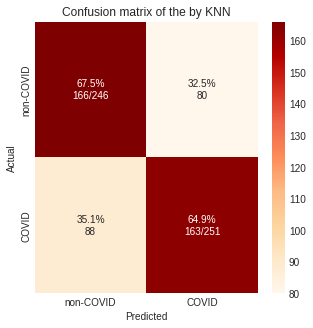

Bilgi: (1984, 1000) 1984
Acc EfficientNetB0-RandomForest score: 89.3
Confusion Matrix:
[[224  22]
 [ 31 220]]
by RandomForest  Algoritması  EfficientNetB0  Dataset, Acc: 89.34 Sen: 87.65  Spe: 91.06  Pre: 90.91  F1-score: 89.25


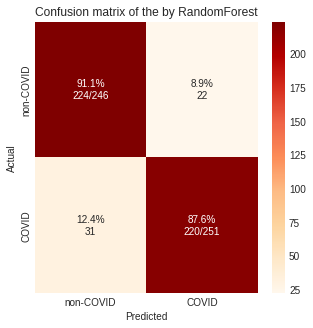

##########################


In [ ]:
from google.colab import drive
import numpy as np
from imblearn.over_sampling import SMOTE,RandomOverSampler
from imblearn.combine import SMOTETomek
import pickle
import warnings
from collections import Counter
from numpy import where
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import joblib
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

basarilar=[]

def perf_measure(cm,alg_name,etiket):
    
    print ("Confusion Matrix:")
    print (cm)
    TN = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TP = cm[1][1]
    
    acc= round(float(TP+TN)/(TP+TN+FP+FN)*100,2)
    sensitivity = round(float(TP) / (TP + FN)*100,2)
    specificity =round(float(TN )/ (FP + TN)*100,2)
    precision=round(float(TP )/ (TP + FP)*100,2)
    F1_score=round(2/((1/sensitivity)+(1/precision)),2)
    print (alg_name," Algoritması ",etiket," Dataset, Acc:",acc, "Sen:",sensitivity," Spe:",specificity," Pre:",precision," F1-score:",F1_score)
    basarilar.append([alg_name,etiket,acc,sensitivity,specificity,precision,F1_score])

def cm_analysis(y_true, y_pred,etiket, labels, alg_name,figsize2=(5,5)):

    cm = confusion_matrix(y_true, y_pred, labels=labels)
    perf_measure(cm,alg_name,etiket)

    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)

    labels2=['non-COVID','COVID']
    
    cm = pd.DataFrame(cm, index=labels2, columns=labels2)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize2)
    sns.heatmap(cm, cmap="OrRd",annot=annot, fmt='', ax=ax)
    #plt.savefig(filename)
    plt.title('Confusion matrix of the '+alg_name)
    plt.show()

def class_bilgi(y,etiket):
    print (etiket, "bilgisi")
    t=0
    for class_code in range(0,7):
        s=0
        for value in y:
            if value==class_code:
                s+=1
                
        print ("Class no:",class_code," sayısı:",s)
        t+=s
    
    print ("Toplam:",t)

warnings.filterwarnings("ignore")

def plot_ciz(X_new,y_new,counter):
  # scatter plot of examples by class label
  for label, _ in counter.items():
    row_ix = where(y_new == label)[0]
    pyplot.scatter(X_new[row_ix, 0], X_new[row_ix, 1], label=str(label))
  pyplot.legend()
  pyplot.show()



def func_siniflandir(x_train,y_train,x_test,y_test,etiket):
    
    labels=[0,1]    
    alg_lists=['SVM','LR','XGBoost','GradientBoost','KNN','RandomForest']

    for i,clf in enumerate([svm.SVC(),LogisticRegression(), XGBClassifier(), GradientBoostingClassifier(),KNeighborsClassifier(),RandomForestClassifier()]):
      print ("Bilgi:",x_train.shape,len(y_train))

      clf.fit(x_train,y_train)
      results = clf.predict(x_test)
      acc=round(accuracy_score(y_test, results),3)
      print ("Acc "+etiket+"-"+alg_lists[i]+ " score:",acc*100)
      #joblib.dump(clf,anaKlasor+"/pretrained_features/"+etiket+".pkl")
      cm_analysis(y_test, results, etiket,labels, "by "+alg_lists[i],figsize2=(5,5))


drive.mount('/content/drive')
main_path =  "/content/drive/MyDrive/tez/"
label="EfficientNetB0"

etiket="EfficientNetB0"
X=np.load(main_path+"/pretrained_features/"+label+"_features.npy")
y=np.load(main_path+"/pretrained_features/"+label+"_output.npy")
print (X.shape)

#X=X.reshape(X.shape[2])
X = X.reshape(X.shape[0], -1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state=42)

func_siniflandir(x_train,y_train,x_test,y_test,etiket)
#plot_ciz(X, y,counter)
print ("##########################")

In [ ]:
X=np.concatenate((x_vgg16,x_vgg19),axis=1)
y=np.load(main_path+"/features/"+label+"_output.npy")

# PreTrained features extraction by DENSENET201

In [ ]:
import numpy as np
np.random.seed(123)  # for reproducibility
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
import pickle
from keras.layers import Convolution2D, MaxPooling2D	
from  keras.utils import np_utils
from matplotlib import pyplot as plt
from keras.datasets import mnist
import joblib
import pandas as pd
import os
from google.colab import drive
import numpy as np
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras import callbacks,optimizers
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.linear_model import Ridge

from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import scipy.misc
from keras.layers import Concatenate, Dense, LSTM, Input, concatenate
from keras import backend as K
from tensorflow.keras.utils import img_to_array
from skimage.transform import resize
import os
import joblib
from keras.layers import Flatten
from keras.models import Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from tensorflow.keras.applications import DenseNet201

#Drive bağlama
drive.mount('/content/drive')
anaKlasor =  "/content/drive/MyDrive/tez/"

label="DenseNet201"
model = DenseNet201(weights='imagenet')

#Verisetim
anaKlasor1=anaKlasor+'dataset_deneme/'
altKlasorler =  os.listdir(anaKlasor1)

anaKlasor=anaKlasor1
Features=[]
dosyaAdlari = []
Siniflar=[]

hedef_class=['non-COVID','COVID']

input_size=(224,224,3)

altKlasorler =  os.listdir(anaKlasor)
for index, altKlasor in enumerate(altKlasorler):
  print ("Kategori:",altKlasor)

  yol=anaKlasor+altKlasor
  goruntuler=os.listdir(yol)
  for goruntu in goruntuler:
    print (yol+'/'+goruntu)

    img = image.load_img(os.path.join(anaKlasor,altKlasor,goruntu), target_size=input_size)
    
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    xx = model.predict(x)

    Features.append(xx)
    print(label,"Index:",hedef_class.index(altKlasor),altKlasor,xx.shape)
    
    Siniflar.append(hedef_class.index(altKlasor))

Features=np.array(Features)
np.save(main_path+"/pretrained_features/"+label+"_features.npy",Features)
np.save(main_path+"/pretrained_features/"+label+"_output.npy",Siniflar)
print (main_path)
print (Siniflar)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
82534400/82524592 [==============================] - 3s 0us/step
Kategori: COVID
/content/drive/MyDrive/tez/dataset_deneme/COVID/Covid (1233).png
DenseNet201 Index: 1 COVID (1, 1000)
/content/drive/MyDrive/tez/dataset_deneme/COVID/Covid (156).png
DenseNet201 Index: 1 COVID (1, 1000)
/content/drive/MyDrive/tez/dataset_deneme/COVID/Covid (266).png
DenseNet201 Index: 1 COVID (1, 1000)
/content/drive/MyDrive/tez/dataset_deneme/COVID/Covid (221).png
DenseNet201 Index: 1 COVID (1, 1000)
/content/drive/MyDrive/tez/dataset_deneme/COVID/Covid (151).png
DenseNet201 Index: 1 COVID (1, 1000)
/content/drive/MyDrive/tez/dataset_deneme/COVID/Covid (258).png
DenseNet201 Index: 1 COVID (1, 1000)
/content/drive/MyDrive/tez/dataset_deneme/COVID/Covid (268).png
DenseNet201 Index: 1 COVID (1, 1000)
/content/drive/MyDrive/tez/dataset_deneme/COVID/Covid (205).png
DenseNet201 Index:

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(2481, 1, 1000)
Bilgi: (1984, 1000) 1984
Acc DenseNet201-SVM score: 68.2
Confusion Matrix:
[[180  66]
 [ 92 159]]
by SVM  Algoritması  DenseNet201  Dataset, Acc: 68.21 Sen: 63.35  Spe: 73.17  Pre: 70.67  F1-score: 66.81


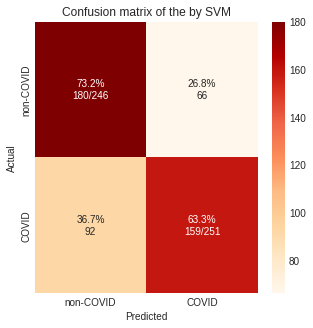

Bilgi: (1984, 1000) 1984
Acc DenseNet201-LR score: 67.2
Confusion Matrix:
[[177  69]
 [ 94 157]]
by LR  Algoritması  DenseNet201  Dataset, Acc: 67.2 Sen: 62.55  Spe: 71.95  Pre: 69.47  F1-score: 65.83


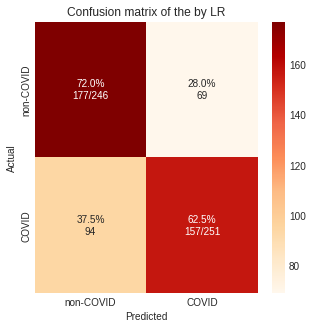

Bilgi: (1984, 1000) 1984
Acc DenseNet201-XGBoost score: 89.5
Confusion Matrix:
[[222  24]
 [ 28 223]]
by XGBoost  Algoritması  DenseNet201  Dataset, Acc: 89.54 Sen: 88.84  Spe: 90.24  Pre: 90.28  F1-score: 89.55


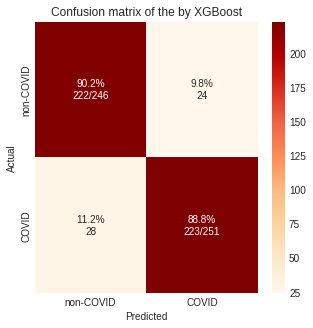

Bilgi: (1984, 1000) 1984
Acc DenseNet201-GradientBoost score: 86.7
Confusion Matrix:
[[218  28]
 [ 38 213]]
by GradientBoost  Algoritması  DenseNet201  Dataset, Acc: 86.72 Sen: 84.86  Spe: 88.62  Pre: 88.38  F1-score: 86.58


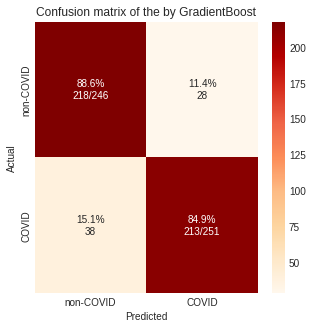

Bilgi: (1984, 1000) 1984
Acc DenseNet201-KNN score: 69.6
Confusion Matrix:
[[182  64]
 [ 87 164]]
by KNN  Algoritması  DenseNet201  Dataset, Acc: 69.62 Sen: 65.34  Spe: 73.98  Pre: 71.93  F1-score: 68.48


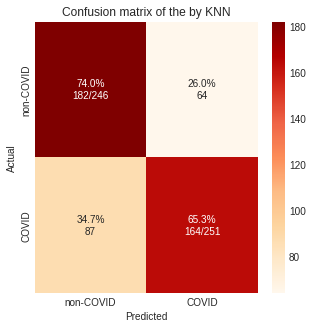

Bilgi: (1984, 1000) 1984
Acc DenseNet201-RandomForest score: 89.1
Confusion Matrix:
[[224  22]
 [ 32 219]]
by RandomForest  Algoritması  DenseNet201  Dataset, Acc: 89.13 Sen: 87.25  Spe: 91.06  Pre: 90.87  F1-score: 89.02


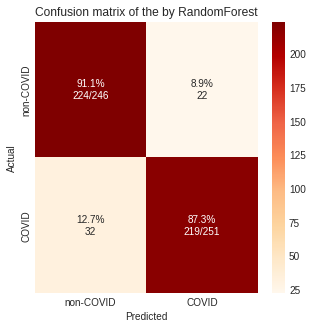

##########################


In [ ]:
from google.colab import drive
import numpy as np
from imblearn.over_sampling import SMOTE,RandomOverSampler
from imblearn.combine import SMOTETomek
import pickle
import warnings
from collections import Counter
from numpy import where
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import joblib
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
basarilar=[]

def perf_measure(cm,alg_name,etiket):
    
    print ("Confusion Matrix:")
    print (cm)
    TN = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TP = cm[1][1]
    
    acc= round(float(TP+TN)/(TP+TN+FP+FN)*100,2)
    sensitivity = round(float(TP) / (TP + FN)*100,2)
    specificity =round(float(TN )/ (FP + TN)*100,2)
    precision=round(float(TP )/ (TP + FP)*100,2)
    F1_score=round(2/((1/sensitivity)+(1/precision)),2)
    print (alg_name," Algoritması ",etiket," Dataset, Acc:",acc, "Sen:",sensitivity," Spe:",specificity," Pre:",precision," F1-score:",F1_score)
    basarilar.append([alg_name,etiket,acc,sensitivity,specificity,precision,F1_score])

def cm_analysis(y_true, y_pred,etiket, labels, alg_name,figsize2=(5,5)):

    cm = confusion_matrix(y_true, y_pred, labels=labels)
    perf_measure(cm,alg_name,etiket)

    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)

    labels2=['non-COVID','COVID']
    
    cm = pd.DataFrame(cm, index=labels2, columns=labels2)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize2)
    sns.heatmap(cm, cmap="OrRd",annot=annot, fmt='', ax=ax)
    #plt.savefig(filename)
    plt.title('Confusion matrix of the '+alg_name)
    plt.show()

def class_bilgi(y,etiket):
    print (etiket, "bilgisi")
    t=0
    for class_code in range(0,7):
        s=0
        for value in y:
            if value==class_code:
                s+=1
                
        print ("Class no:",class_code," sayısı:",s)
        t+=s
    
    print ("Toplam:",t)

warnings.filterwarnings("ignore")

def plot_ciz(X_new,y_new,counter):
  # scatter plot of examples by class label
  for label, _ in counter.items():
    row_ix = where(y_new == label)[0]
    pyplot.scatter(X_new[row_ix, 0], X_new[row_ix, 1], label=str(label))
  pyplot.legend()
  pyplot.show()



def func_siniflandir(x_train,y_train,x_test,y_test,etiket):
    
    labels=[0,1]    
    alg_lists=['SVM','LR','XGBoost','GradientBoost','KNN','RandomForest']

    for i,clf in enumerate([svm.SVC(),LogisticRegression(), XGBClassifier(), GradientBoostingClassifier(),KNeighborsClassifier(),RandomForestClassifier()]):
      print ("Bilgi:",x_train.shape,len(y_train))

      clf.fit(x_train,y_train)
      results = clf.predict(x_test)
      acc=round(accuracy_score(y_test, results),3)
      print ("Acc "+etiket+"-"+alg_lists[i]+ " score:",acc*100)
      #joblib.dump(clf,anaKlasor+"/pretrained_features/"+etiket+".pkl")
      cm_analysis(y_test, results, etiket,labels, "by "+alg_lists[i],figsize2=(5,5))


drive.mount('/content/drive')
main_path =  "/content/drive/MyDrive/tez/"
label="DenseNet201"

etiket="DenseNet201"
X=np.load(main_path+"/pretrained_features/"+label+"_features.npy")
y=np.load(main_path+"/pretrained_features/"+label+"_output.npy")
print (X.shape)

#X=X.reshape(X.shape[2])
X = X.reshape(X.shape[0], -1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state=42)

func_siniflandir(x_train,y_train,x_test,y_test,etiket)
#plot_ciz(X, y,counter)
print ("##########################")

In [ ]:
X=np.concatenate((x_vgg16,x_vgg19),axis=1)
y=np.load(main_path+"/features/"+label+"_output.npy")

# PreTrained features extraction by ConvNeXtTiny 

In [ ]:
!pip install tensorflow

In [ ]:
import numpy as np
np.random.seed(123)  # for reproducibility
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
import pickle
from keras.layers import Convolution2D, MaxPooling2D	
from  keras.utils import np_utils
from matplotlib import pyplot as plt
from keras.datasets import mnist
import joblib
import pandas as pd
import os
from google.colab import drive
import numpy as np
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras import callbacks,optimizers
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.linear_model import Ridge

from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import scipy.misc
from keras.layers import Concatenate, Dense, LSTM, Input, concatenate
from keras import backend as K
from tensorflow.keras.utils import img_to_array
from skimage.transform import resize
import os
import joblib
from keras.layers import Flatten
from keras.models import Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.applications import ConvNeXtTiny

#Drive bağlama
drive.mount('/content/drive')
anaKlasor =  "/content/drive/MyDrive/tez/"

label="ConvNeXtTiny"
model = ConvNeXtTiny(weights='imagenet')

#Verisetim
anaKlasor1=anaKlasor+'dataset_deneme/'
altKlasorler =  os.listdir(anaKlasor1)

anaKlasor=anaKlasor1
Features=[]
dosyaAdlari = []
Siniflar=[]

hedef_class=['non-COVID','COVID']

input_size=(224,224,3)

altKlasorler =  os.listdir(anaKlasor)
for index, altKlasor in enumerate(altKlasorler):
  print ("Kategori:",altKlasor)

  yol=anaKlasor+altKlasor
  goruntuler=os.listdir(yol)
  for goruntu in goruntuler:
    print (yol+'/'+goruntu)

    img = image.load_img(os.path.join(anaKlasor,altKlasor,goruntu), target_size=input_size)
    
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    xx = model.predict(x)

    Features.append(xx)
    print(label,"Index:",hedef_class.index(altKlasor),altKlasor,xx.shape)
    
    Siniflar.append(hedef_class.index(altKlasor))

Features=np.array(Features)
np.save(main_path+"/pretrained_features/"+label+"_features.npy",Features)
np.save(main_path+"/pretrained_features/"+label+"_output.npy",Siniflar)
print (main_path)
print (Siniflar)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Kategori: COVID
/content/drive/MyDrive/tez/dataset_deneme/COVID/Covid (1233).png


AttributeError: ignored

In [ ]:
from google.colab import drive
import numpy as np
from imblearn.over_sampling import SMOTE,RandomOverSampler
from imblearn.combine import SMOTETomek
import pickle
import warnings
from collections import Counter
from numpy import where
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import joblib
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
basarilar=[]

def perf_measure(cm,alg_name,etiket):
    
    print ("Confusion Matrix:")
    print (cm)
    TN = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TP = cm[1][1]
    
    acc= round(float(TP+TN)/(TP+TN+FP+FN)*100,2)
    sensitivity = round(float(TP) / (TP + FN)*100,2)
    specificity =round(float(TN )/ (FP + TN)*100,2)
    precision=round(float(TP )/ (TP + FP)*100,2)
    F1_score=round(2/((1/sensitivity)+(1/precision)),2)
    print (alg_name," Algoritması ",etiket," Dataset, Acc:",acc, "Sen:",sensitivity," Spe:",specificity," Pre:",precision," F1-score:",F1_score)
    basarilar.append([alg_name,etiket,acc,sensitivity,specificity,precision,F1_score])

def cm_analysis(y_true, y_pred,etiket, labels, alg_name,figsize2=(5,5)):

    cm = confusion_matrix(y_true, y_pred, labels=labels)
    perf_measure(cm,alg_name,etiket)

    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)

    labels2=['non-COVID','COVID']
    
    cm = pd.DataFrame(cm, index=labels2, columns=labels2)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize2)
    sns.heatmap(cm, cmap="OrRd",annot=annot, fmt='', ax=ax)
    #plt.savefig(filename)
    plt.title('Confusion matrix of the '+alg_name)
    plt.show()

def class_bilgi(y,etiket):
    print (etiket, "bilgisi")
    t=0
    for class_code in range(0,7):
        s=0
        for value in y:
            if value==class_code:
                s+=1
                
        print ("Class no:",class_code," sayısı:",s)
        t+=s
    
    print ("Toplam:",t)

warnings.filterwarnings("ignore")

def plot_ciz(X_new,y_new,counter):
  # scatter plot of examples by class label
  for label, _ in counter.items():
    row_ix = where(y_new == label)[0]
    pyplot.scatter(X_new[row_ix, 0], X_new[row_ix, 1], label=str(label))
  pyplot.legend()
  pyplot.show()



def func_siniflandir(x_train,y_train,x_test,y_test,etiket):
    
    labels=[0,1]    
    alg_lists=['SVM','LR','XGBoost','GradientBoost']

    for i,clf in enumerate([svm.SVC(),LogisticRegression(), XGBClassifier(), GradientBoostingClassifier()]):
      print ("Bilgi:",x_train.shape,len(y_train))

      clf.fit(x_train,y_train)
      results = clf.predict(x_test)
      acc=round(accuracy_score(y_test, results),3)
      print ("Acc "+etiket+"-"+alg_lists[i]+ " score:",acc*100)
      #joblib.dump(clf,anaKlasor+"/pretrained_features/"+etiket+".pkl")
      cm_analysis(y_test, results, etiket,labels, "by "+alg_lists[i],figsize2=(5,5))


drive.mount('/content/drive')
main_path =  "/content/drive/MyDrive/tez/"
label="ConvNeXtTiny"

etiket="ConvNeXtTiny"
X=np.load(main_path+"/pretrained_features/"+label+"_features.npy")
y=np.load(main_path+"/pretrained_features/"+label+"_output.npy")
print (X.shape)

#X=X.reshape(X.shape[2])
X = X.reshape(X.shape[0], -1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state=42)

func_siniflandir(x_train,y_train,x_test,y_test,etiket)
#plot_ciz(X, y,counter)
print ("##########################")

combine features

In [ ]:
X=np.concatenate((x_vgg16,x_vgg19),axis=1)
y=np.load(main_path+"/features/"+label+"_output.npy")

# PreTrained features extraction by VGG19

In [ ]:
import numpy as np
np.random.seed(123)  # for reproducibility
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
import pickle
from keras.layers import Convolution2D, MaxPooling2D	
from  keras.utils import np_utils
from matplotlib import pyplot as plt
from keras.datasets import mnist
import joblib
import pandas as pd
import os
from google.colab import drive
import numpy as np
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras import callbacks,optimizers
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.linear_model import Ridge

from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import scipy.misc
from keras.layers import Concatenate, Dense, LSTM, Input, concatenate
from keras import backend as K
from tensorflow.keras.utils import img_to_array
from skimage.transform import resize
import os
import joblib
from keras.layers import Flatten
from keras.models import Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.applications.vgg19 import VGG19


#Drive bağlama
drive.mount('/content/drive')
anaKlasor =  "/content/drive/MyDrive/tez/"

label="VGG19"
model = VGG19(weights='imagenet')

#Verisetim
anaKlasor1=anaKlasor+'dataset_deneme/'
altKlasorler =  os.listdir(anaKlasor1)

anaKlasor=anaKlasor1
Features=[]
dosyaAdlari = []
Siniflar=[]

hedef_class=['non-COVID','COVID']

input_size=(224,224,3)

altKlasorler =  os.listdir(anaKlasor)
for index, altKlasor in enumerate(altKlasorler):
  print ("Kategori:",altKlasor)

  yol=anaKlasor+altKlasor
  goruntuler=os.listdir(yol)
  for goruntu in goruntuler:
    print (yol+'/'+goruntu)

    img = image.load_img(os.path.join(anaKlasor,altKlasor,goruntu), target_size=input_size)
    
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    xx = model.predict(x)

    Features.append(xx)
    print(label,"Index:",hedef_class.index(altKlasor),altKlasor,xx.shape)
    
    Siniflar.append(hedef_class.index(altKlasor))

Features=np.array(Features)
np.save(main_path+"/pretrained_features/"+label+"_features.npy",Features)
np.save(main_path+"/pretrained_features/"+label+"_output.npy",Siniflar)
print (main_path)
print (Siniflar)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
574726144/574710816 [==============================] - 16s 0us/step
Kategori: COVID
/content/drive/MyDrive/tez/dataset_deneme/COVID/Covid (1233).png
VGG19 Index: 1 COVID (1, 1000)
/content/drive/MyDrive/tez/dataset_deneme/COVID/Covid (156).png
VGG19 Index: 1 COVID (1, 1000)
/content/drive/MyDrive/tez/dataset_deneme/COVID/Covid (266).png
VGG19 Index: 1 COVID (1, 1000)
/content/drive/MyDrive/tez/dataset_deneme/COVID/Covid (221).png
VGG19 Index: 1 COVID (1, 1000)
/content/drive/MyDrive/tez/dataset_deneme/COVID/Covid (151).png
VGG19 Index: 1 COVID (1, 1000)
/content/drive/MyDrive/tez/dataset_deneme/COVID/Covid (258).png
VGG19 Index: 1 COVID (1, 1000)
/content/drive/MyDrive/tez/dataset_deneme/COVID/Covid (268).png
VGG19 Index: 1 COVID (1, 1000)
/content/drive/MyDrive/tez/dataset_deneme/COVID/Covid (205).png
VGG19 Index: 1 COVID (1, 1000)
/content/drive/MyDrive/tez

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(2481, 1, 1000)
Bilgi: (1984, 1000) 1984
Acc VGG19-SVM score: 71.2
Confusion Matrix:
[[176  70]
 [ 73 178]]
by SVM  Algoritması  VGG19  Dataset, Acc: 71.23 Sen: 70.92  Spe: 71.54  Pre: 71.77  F1-score: 71.34


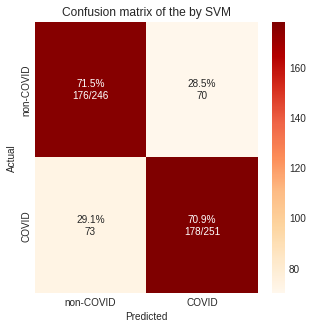

Bilgi: (1984, 1000) 1984
Acc VGG19-LR score: 64.2
Confusion Matrix:
[[165  81]
 [ 97 154]]
by LR  Algoritması  VGG19  Dataset, Acc: 64.19 Sen: 61.35  Spe: 67.07  Pre: 65.53  F1-score: 63.37


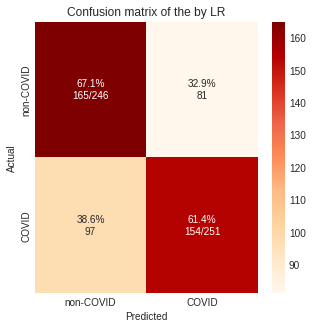

Bilgi: (1984, 1000) 1984
Acc VGG19-XGBoost score: 88.9
Confusion Matrix:
[[223  23]
 [ 32 219]]
by XGBoost  Algoritması  VGG19  Dataset, Acc: 88.93 Sen: 87.25  Spe: 90.65  Pre: 90.5  F1-score: 88.85


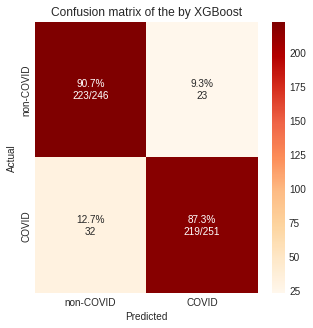

Bilgi: (1984, 1000) 1984
Acc VGG19-GradientBoost score: 85.1
Confusion Matrix:
[[217  29]
 [ 45 206]]
by GradientBoost  Algoritması  VGG19  Dataset, Acc: 85.11 Sen: 82.07  Spe: 88.21  Pre: 87.66  F1-score: 84.77


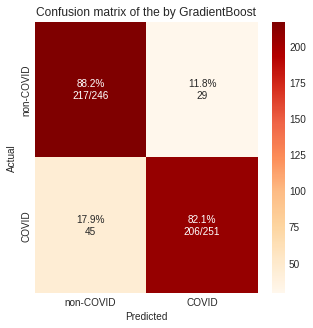

Bilgi: (1984, 1000) 1984
Acc VGG19-KNN score: 70.19999999999999
Confusion Matrix:
[[184  62]
 [ 86 165]]
by KNN  Algoritması  VGG19  Dataset, Acc: 70.22 Sen: 65.74  Spe: 74.8  Pre: 72.69  F1-score: 69.04


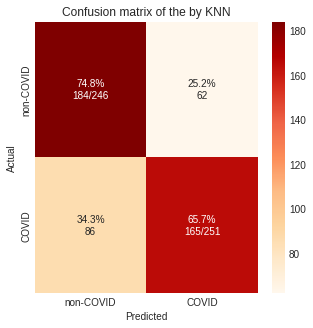

Bilgi: (1984, 1000) 1984
Acc VGG19-RandomForest score: 85.5
Confusion Matrix:
[[213  33]
 [ 39 212]]
by RandomForest  Algoritması  VGG19  Dataset, Acc: 85.51 Sen: 84.46  Spe: 86.59  Pre: 86.53  F1-score: 85.48


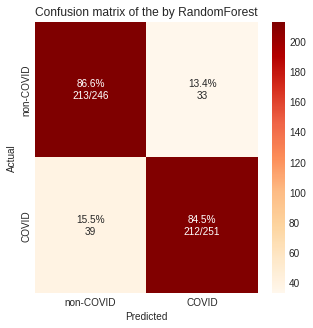

##########################


In [ ]:
from google.colab import drive
import numpy as np
from imblearn.over_sampling import SMOTE,RandomOverSampler
from imblearn.combine import SMOTETomek
import pickle
import warnings
from collections import Counter
from numpy import where
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import joblib
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

basarilar=[]

def perf_measure(cm,alg_name,etiket):
    
    print ("Confusion Matrix:")
    print (cm)
    TN = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TP = cm[1][1]
    
    acc= round(float(TP+TN)/(TP+TN+FP+FN)*100,2)
    sensitivity = round(float(TP) / (TP + FN)*100,2)
    specificity =round(float(TN )/ (FP + TN)*100,2)
    precision=round(float(TP )/ (TP + FP)*100,2)
    F1_score=round(2/((1/sensitivity)+(1/precision)),2)
    print (alg_name," Algoritması ",etiket," Dataset, Acc:",acc, "Sen:",sensitivity," Spe:",specificity," Pre:",precision," F1-score:",F1_score)
    basarilar.append([alg_name,etiket,acc,sensitivity,specificity,precision,F1_score])

def cm_analysis(y_true, y_pred,etiket, labels, alg_name,figsize2=(5,5)):

    cm = confusion_matrix(y_true, y_pred, labels=labels)
    perf_measure(cm,alg_name,etiket)

    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)

    labels2=['non-COVID','COVID']
    
    cm = pd.DataFrame(cm, index=labels2, columns=labels2)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize2)
    sns.heatmap(cm, cmap="OrRd",annot=annot, fmt='', ax=ax)
    #plt.savefig(filename)
    plt.title('Confusion matrix of the '+alg_name)
    plt.show()

def class_bilgi(y,etiket):
    print (etiket, "bilgisi")
    t=0
    for class_code in range(0,7):
        s=0
        for value in y:
            if value==class_code:
                s+=1
                
        print ("Class no:",class_code," sayısı:",s)
        t+=s
    
    print ("Toplam:",t)

warnings.filterwarnings("ignore")

def plot_ciz(X_new,y_new,counter):
  # scatter plot of examples by class label
  for label, _ in counter.items():
    row_ix = where(y_new == label)[0]
    pyplot.scatter(X_new[row_ix, 0], X_new[row_ix, 1], label=str(label))
  pyplot.legend()
  pyplot.show()



def func_siniflandir(x_train,y_train,x_test,y_test,etiket):
    
    labels=[0,1]    
    alg_lists=['SVM','LR','XGBoost','GradientBoost','KNN','RandomForest']

    for i,clf in enumerate([svm.SVC(),LogisticRegression(), XGBClassifier(), GradientBoostingClassifier(),KNeighborsClassifier(),RandomForestClassifier()]):
      print ("Bilgi:",x_train.shape,len(y_train))

      clf.fit(x_train,y_train)
      results = clf.predict(x_test)
      acc=round(accuracy_score(y_test, results),3)
      print ("Acc "+etiket+"-"+alg_lists[i]+ " score:",acc*100)
      #joblib.dump(clf,anaKlasor+"/pretrained_features/"+etiket+".pkl")
      cm_analysis(y_test, results, etiket,labels, "by "+alg_lists[i],figsize2=(5,5))


drive.mount('/content/drive')
main_path =  "/content/drive/MyDrive/tez/"
label="VGG19"

etiket="VGG19"
X=np.load(main_path+"/pretrained_features/"+label+"_features.npy")
y=np.load(main_path+"/pretrained_features/"+label+"_output.npy")
print (X.shape)

#X=X.reshape(X.shape[2])
X = X.reshape(X.shape[0], -1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state=42)

func_siniflandir(x_train,y_train,x_test,y_test,etiket)
#plot_ciz(X, y,counter)
print ("##########################")

# PreTrained features extraction by MobileNetV2

In [ ]:
import numpy as np
np.random.seed(123)  # for reproducibility
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
import pickle
from keras.layers import Convolution2D, MaxPooling2D	
from  keras.utils import np_utils
from matplotlib import pyplot as plt
from keras.datasets import mnist
import joblib
import pandas as pd
import os
from google.colab import drive
import numpy as np
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras import callbacks,optimizers
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.linear_model import Ridge

from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import scipy.misc
from keras.layers import Concatenate, Dense, LSTM, Input, concatenate
from keras import backend as K
from tensorflow.keras.utils import img_to_array
from skimage.transform import resize
import os
import joblib
from keras.layers import Flatten
from keras.models import Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

#Drive bağlama
drive.mount('/content/drive')
anaKlasor =  "/content/drive/MyDrive/tez/"

label="MobileNetV2"
model = MobileNetV2(weights='imagenet')

#Verisetim
anaKlasor1=anaKlasor+'dataset_deneme/'
altKlasorler =  os.listdir(anaKlasor1)

anaKlasor=anaKlasor1
Features=[]
dosyaAdlari = []
Siniflar=[]

hedef_class=['non-COVID','COVID']

input_size=(224,224,3)

altKlasorler =  os.listdir(anaKlasor)
for index, altKlasor in enumerate(altKlasorler):
  print ("Kategori:",altKlasor)

  yol=anaKlasor+altKlasor
  goruntuler=os.listdir(yol)
  for goruntu in goruntuler:
    print (yol+'/'+goruntu)

    img = image.load_img(os.path.join(anaKlasor,altKlasor,goruntu), target_size=input_size)
    
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    xx = model.predict(x)

    Features.append(xx)
    print(label,"Index:",hedef_class.index(altKlasor),altKlasor,xx.shape)
    
    Siniflar.append(hedef_class.index(altKlasor))

Features=np.array(Features)
np.save(main_path+"/pretrained_features/"+label+"_features.npy",Features)
np.save(main_path+"/pretrained_features/"+label+"_output.npy",Siniflar)
print (main_path)
print (Siniflar)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
14548992/14536120 [==============================] - 1s 0us/step
Kategori: COVID
/content/drive/MyDrive/tez/dataset_deneme/COVID/Covid (1233).png
MobileNetV2 Index: 1 COVID (1, 1000)
/content/drive/MyDrive/tez/dataset_deneme/COVID/Covid (156).png
MobileNetV2 Index: 1 COVID (1, 1000)
/content/drive/MyDrive/tez/dataset_deneme/COVID/Covid (266).png
MobileNetV2 Index: 1 COVID (1, 1000)
/content/drive/MyDrive/tez/dataset_deneme/COVID/Covid (221).png
MobileNetV2 Index: 1 COVID (1, 1000)
/content/drive/MyDrive/tez/dataset_deneme/COVID/Covid (151).png
MobileNetV2 Index: 1 COVID (1, 1000)
/content/drive/MyDrive/tez/dataset_deneme/COVID/Covid (258).png
MobileNetV2 Index: 1 COVID (1, 1000)
/content/drive/MyDrive/tez/dataset_deneme/COVID/Covid (268).png
MobileNetV2 Index: 1 COVID (1, 1000)
/content/drive/MyDrive/tez/dataset_deneme/COVID/Covid (205).png
MobileNetV2 Index:

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(2481, 1, 1000)
Bilgi: (1984, 1000) 1984
Acc MobileNetV2-SVM score: 75.5
Confusion Matrix:
[[208  38]
 [ 84 167]]
by SVM  Algoritması  MobileNetV2  Dataset, Acc: 75.45 Sen: 66.53  Spe: 84.55  Pre: 81.46  F1-score: 73.24


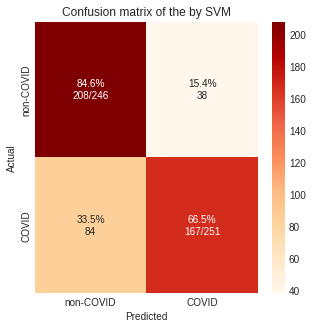

Bilgi: (1984, 1000) 1984
Acc MobileNetV2-LR score: 72.0
Confusion Matrix:
[[183  63]
 [ 76 175]]
by LR  Algoritması  MobileNetV2  Dataset, Acc: 72.03 Sen: 69.72  Spe: 74.39  Pre: 73.53  F1-score: 71.57


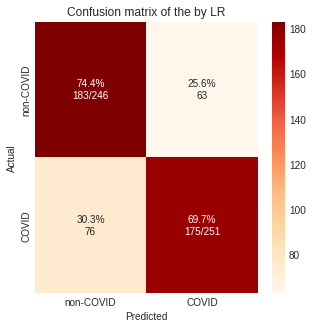

Bilgi: (1984, 1000) 1984
Acc MobileNetV2-XGBoost score: 89.9
Confusion Matrix:
[[225  21]
 [ 29 222]]
by XGBoost  Algoritması  MobileNetV2  Dataset, Acc: 89.94 Sen: 88.45  Spe: 91.46  Pre: 91.36  F1-score: 89.88


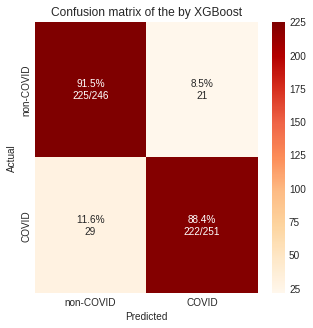

Bilgi: (1984, 1000) 1984
Acc MobileNetV2-GradientBoost score: 87.5
Confusion Matrix:
[[217  29]
 [ 33 218]]
by GradientBoost  Algoritması  MobileNetV2  Dataset, Acc: 87.53 Sen: 86.85  Spe: 88.21  Pre: 88.26  F1-score: 87.55


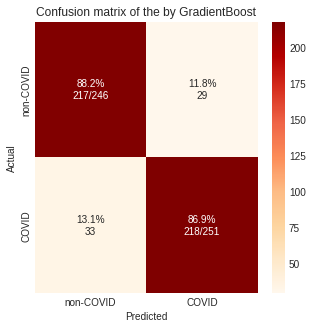

Bilgi: (1984, 1000) 1984
Acc MobileNetV2-KNN score: 69.6
Confusion Matrix:
[[181  65]
 [ 86 165]]
by KNN  Algoritması  MobileNetV2  Dataset, Acc: 69.62 Sen: 65.74  Spe: 73.58  Pre: 71.74  F1-score: 68.61


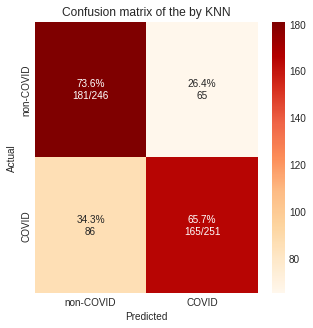

Bilgi: (1984, 1000) 1984
Acc MobileNetV2-RandomForest score: 85.3
Confusion Matrix:
[[213  33]
 [ 40 211]]
by RandomForest  Algoritması  MobileNetV2  Dataset, Acc: 85.31 Sen: 84.06  Spe: 86.59  Pre: 86.48  F1-score: 85.25


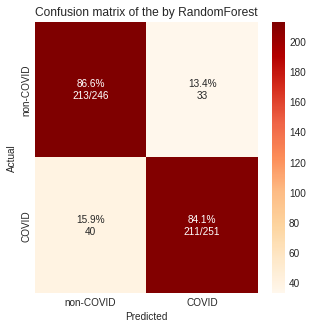

##########################


In [ ]:
from google.colab import drive
import numpy as np
from imblearn.over_sampling import SMOTE,RandomOverSampler
from imblearn.combine import SMOTETomek
import pickle
import warnings
from collections import Counter
from numpy import where
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import joblib
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

basarilar=[]

def perf_measure(cm,alg_name,etiket):
    
    print ("Confusion Matrix:")
    print (cm)
    TN = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TP = cm[1][1]
    
    acc= round(float(TP+TN)/(TP+TN+FP+FN)*100,2)
    sensitivity = round(float(TP) / (TP + FN)*100,2)
    specificity =round(float(TN )/ (FP + TN)*100,2)
    precision=round(float(TP )/ (TP + FP)*100,2)
    F1_score=round(2/((1/sensitivity)+(1/precision)),2)
    print (alg_name," Algoritması ",etiket," Dataset, Acc:",acc, "Sen:",sensitivity," Spe:",specificity," Pre:",precision," F1-score:",F1_score)
    basarilar.append([alg_name,etiket,acc,sensitivity,specificity,precision,F1_score])

def cm_analysis(y_true, y_pred,etiket, labels, alg_name,figsize2=(5,5)):

    cm = confusion_matrix(y_true, y_pred, labels=labels)
    perf_measure(cm,alg_name,etiket)

    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)

    labels2=['non-COVID','COVID']
    
    cm = pd.DataFrame(cm, index=labels2, columns=labels2)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize2)
    sns.heatmap(cm, cmap="OrRd",annot=annot, fmt='', ax=ax)
    #plt.savefig(filename)
    plt.title('Confusion matrix of the '+alg_name)
    plt.show()

def class_bilgi(y,etiket):
    print (etiket, "bilgisi")
    t=0
    for class_code in range(0,7):
        s=0
        for value in y:
            if value==class_code:
                s+=1
                
        print ("Class no:",class_code," sayısı:",s)
        t+=s
    
    print ("Toplam:",t)

warnings.filterwarnings("ignore")

def plot_ciz(X_new,y_new,counter):
  # scatter plot of examples by class label
  for label, _ in counter.items():
    row_ix = where(y_new == label)[0]
    pyplot.scatter(X_new[row_ix, 0], X_new[row_ix, 1], label=str(label))
  pyplot.legend()
  pyplot.show()



def func_siniflandir(x_train,y_train,x_test,y_test,etiket):
    
    labels=[0,1]    
    alg_lists=['SVM','LR','XGBoost','GradientBoost','KNN','RandomForest']

    for i,clf in enumerate([svm.SVC(),LogisticRegression(), XGBClassifier(), GradientBoostingClassifier(),KNeighborsClassifier(),RandomForestClassifier()]):
      print ("Bilgi:",x_train.shape,len(y_train))

      clf.fit(x_train,y_train)
      results = clf.predict(x_test)
      acc=round(accuracy_score(y_test, results),3)
      print ("Acc "+etiket+"-"+alg_lists[i]+ " score:",acc*100)
      #joblib.dump(clf,anaKlasor+"/pretrained_features/"+etiket+".pkl")
      cm_analysis(y_test, results, etiket,labels, "by "+alg_lists[i],figsize2=(5,5))


drive.mount('/content/drive')
main_path =  "/content/drive/MyDrive/tez/"
label="MobileNetV2"

etiket="MobileNetV2"
X=np.load(main_path+"/pretrained_features/"+label+"_features.npy")
y=np.load(main_path+"/pretrained_features/"+label+"_output.npy")
print (X.shape)

#X=X.reshape(X.shape[2])
X = X.reshape(X.shape[0], -1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state=42)

func_siniflandir(x_train,y_train,x_test,y_test,etiket)
#plot_ciz(X, y,counter)
print ("##########################")

# PreTrained features extraction by Xception

In [ ]:
!pip install imutils
!pip install image-classifiers==1.0.0b1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for image-classifiers: filename=image_classifiers-1.0.0b1-py3-none-any.whl size=19968 sha256=f14c1760b03b16740ce7bfdb1feaaac99481ed386f8c00b3a3bcff6d3ac0b281
  Stored in directory: /root/.cache/pip/wheels/59/ee/99/bdd974449ed4653c3c2e37d600817c9da816057dfa43c67878
Successfully built image-classifiers


In [ ]:
!pip install matplotlib-venn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [ ]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install cartopy
import cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
import numpy as np
np.random.seed(123)  # for reproducibility
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
import pickle
from keras.layers import Convolution2D, MaxPooling2D	
from  keras.utils import np_utils
from matplotlib import pyplot as plt
from keras.datasets import mnist
import joblib
import pandas as pd
import os
from google.colab import drive
import numpy as np
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras import callbacks,optimizers
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.linear_model import Ridge

from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import scipy.misc
from keras.layers import Concatenate, Dense, LSTM, Input, concatenate
from keras import backend as K
from tensorflow.keras.utils import img_to_array
from skimage.transform import resize
import os
import joblib
from keras.layers import Flatten
from keras.models import Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf 

from keras.applications import Xception

#Drive bağlama
drive.mount('/content/drive')
anaKlasor =  "/content/drive/MyDrive/tez/"

label="Xception"
model = Xception(weights='imagenet')

#Verisetim
anaKlasor1=anaKlasor+'dataset_deneme/'
altKlasorler =  os.listdir(anaKlasor1)

anaKlasor=anaKlasor1
Features=[]
dosyaAdlari = []
Siniflar=[]

hedef_class=['non-COVID','COVID']

input_size=(224,224,3)

altKlasorler =  os.listdir(anaKlasor)
for index, altKlasor in enumerate(altKlasorler):
  print ("Kategori:",altKlasor)

  yol=anaKlasor+altKlasor
  goruntuler=os.listdir(yol)
  for goruntu in goruntuler:
    print (yol+'/'+goruntu)

    img = image.load_img(os.path.join(anaKlasor,altKlasor,goruntu), target_size=input_size)
    
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    xx = model.predict(x)

    Features.append(xx)
    print(label,"Index:",hedef_class.index(altKlasor),altKlasor,xx.shape)
    
    Siniflar.append(hedef_class.index(altKlasor))

Features=np.array(Features)
np.save(main_path+"/pretrained_features/"+label+"_features.npy",Features)
np.save(main_path+"/pretrained_features/"+label+"_output.npy",Siniflar)
print (main_path)
print (Siniflar)


ModuleNotFoundError: ignored

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(2481, 1, 1000)
Bilgi: (1984, 1000) 1984
Acc ResNet50-SVM score: 80.5
Confusion Matrix:
[[214  32]
 [ 65 186]]
by SVM  Algoritması  ResNet50  Dataset, Acc: 80.48 Sen: 74.1  Spe: 86.99  Pre: 85.32  F1-score: 79.32


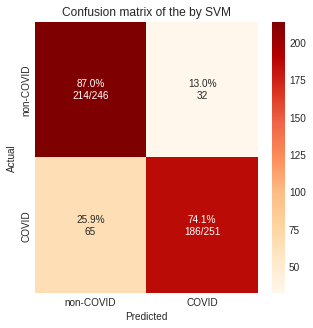

Bilgi: (1984, 1000) 1984
Acc ResNet50-LR score: 68.2
Confusion Matrix:
[[189  57]
 [101 150]]
by LR  Algoritması  ResNet50  Dataset, Acc: 68.21 Sen: 59.76  Spe: 76.83  Pre: 72.46  F1-score: 65.5


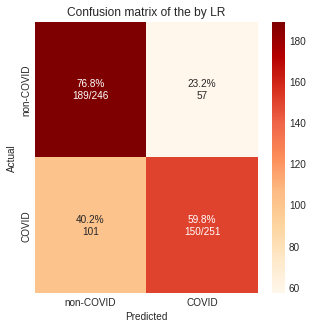

Bilgi: (1984, 1000) 1984
Acc ResNet50-XGBoost score: 90.9
Confusion Matrix:
[[227  19]
 [ 26 225]]
by XGBoost  Algoritması  ResNet50  Dataset, Acc: 90.95 Sen: 89.64  Spe: 92.28  Pre: 92.21  F1-score: 90.91


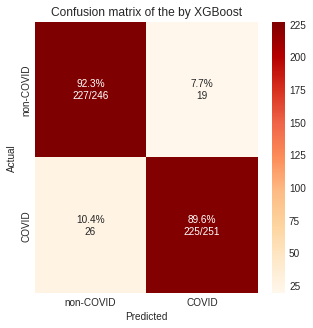

Bilgi: (1984, 1000) 1984
Acc ResNet50-GradientBoost score: 88.7
Confusion Matrix:
[[224  22]
 [ 34 217]]
by GradientBoost  Algoritması  ResNet50  Dataset, Acc: 88.73 Sen: 86.45  Spe: 91.06  Pre: 90.79  F1-score: 88.57


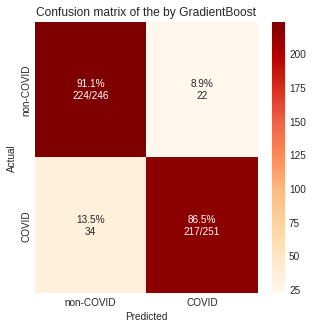

##########################


In [ ]:
from google.colab import drive
import numpy as np
from imblearn.over_sampling import SMOTE,RandomOverSampler
from imblearn.combine import SMOTETomek
import pickle
import warnings
from collections import Counter
from numpy import where
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import joblib
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

basarilar=[]

def perf_measure(cm,alg_name,etiket):
    
    print ("Confusion Matrix:")
    print (cm)
    TN = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TP = cm[1][1]
    
    acc= round(float(TP+TN)/(TP+TN+FP+FN)*100,2)
    sensitivity = round(float(TP) / (TP + FN)*100,2)
    specificity =round(float(TN )/ (FP + TN)*100,2)
    precision=round(float(TP )/ (TP + FP)*100,2)
    F1_score=round(2/((1/sensitivity)+(1/precision)),2)
    print (alg_name," Algoritması ",etiket," Dataset, Acc:",acc, "Sen:",sensitivity," Spe:",specificity," Pre:",precision," F1-score:",F1_score)
    basarilar.append([alg_name,etiket,acc,sensitivity,specificity,precision,F1_score])

def cm_analysis(y_true, y_pred,etiket, labels, alg_name,figsize2=(5,5)):

    cm = confusion_matrix(y_true, y_pred, labels=labels)
    perf_measure(cm,alg_name,etiket)

    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)

    labels2=['non-COVID','COVID']
    
    cm = pd.DataFrame(cm, index=labels2, columns=labels2)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize2)
    sns.heatmap(cm, cmap="OrRd",annot=annot, fmt='', ax=ax)
    #plt.savefig(filename)
    plt.title('Confusion matrix of the '+alg_name)
    plt.show()

def class_bilgi(y,etiket):
    print (etiket, "bilgisi")
    t=0
    for class_code in range(0,7):
        s=0
        for value in y:
            if value==class_code:
                s+=1
                
        print ("Class no:",class_code," sayısı:",s)
        t+=s
    
    print ("Toplam:",t)

warnings.filterwarnings("ignore")

def plot_ciz(X_new,y_new,counter):
  # scatter plot of examples by class label
  for label, _ in counter.items():
    row_ix = where(y_new == label)[0]
    pyplot.scatter(X_new[row_ix, 0], X_new[row_ix, 1], label=str(label))
  pyplot.legend()
  pyplot.show()



def func_siniflandir(x_train,y_train,x_test,y_test,etiket):
    
    labels=[0,1]    
    alg_lists=['SVM','LR','XGBoost','GradientBoost','KNN']

    for i,clf in enumerate([svm.SVC(),LogisticRegression(), XGBClassifier(), GradientBoostingClassifier(),KNeighborsClassifier()]):
      print ("Bilgi:",x_train.shape,len(y_train))

      clf.fit(x_train,y_train)
      results = clf.predict(x_test)
      acc=round(accuracy_score(y_test, results),3)
      print ("Acc "+etiket+"-"+alg_lists[i]+ " score:",acc*100)
      #joblib.dump(clf,anaKlasor+"/pretrained_features/"+etiket+".pkl")
      cm_analysis(y_test, results, etiket,labels, "by "+alg_lists[i],figsize2=(5,5))


drive.mount('/content/drive')
main_path =  "/content/drive/MyDrive/tez/"
label="Xception"

etiket="Xception"
X=np.load(main_path+"/pretrained_features/"+label+"_features.npy")
y=np.load(main_path+"/pretrained_features/"+label+"_output.npy")
print (X.shape)

#X=X.reshape(X.shape[2])
X = X.reshape(X.shape[0], -1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state=42)

func_siniflandir(x_train,y_train,x_test,y_test,etiket)
#plot_ciz(X, y,counter)
print ("##########################")

# PreTrained features extraction by ResNET101

In [ ]:
!pip install -U git+https://github.com/keras-team/keras git+https://github.com/keras-team/keras-applications



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/keras-team/keras to /tmp/pip-req-build-ilv0m9tv
  Running command git clone --filter=blob:none --quiet https://github.com/keras-team/keras /tmp/pip-req-build-ilv0m9tv
  Resolved https://github.com/keras-team/keras to commit 994e586961db13586868ed4be2c4abff16ed6b70
ERROR: git+https://github.com/keras-team/keras does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


In [ ]:
import numpy as np
np.random.seed(123)  # for reproducibility
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
import pickle
from keras.layers import Convolution2D, MaxPooling2D	
from  keras.utils import np_utils
from matplotlib import pyplot as plt
from keras.datasets import mnist
import joblib
import pandas as pd
import os
from google.colab import drive
import numpy as np
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras import callbacks,optimizers
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.linear_model import Ridge

from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import scipy.misc
from keras.layers import Concatenate, Dense, LSTM, Input, concatenate
from keras import backend as K
from tensorflow.keras.utils import img_to_array
from skimage.transform import resize
import os
import joblib
from keras.layers import Flatten
from keras.models import Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.applications import ResNet101


#Drive bağlama
drive.mount('/content/drive')
anaKlasor =  "/content/drive/MyDrive/tez/"

label="ResNet101"
model = ResNet101(weights='imagenet')

#Verisetim
anaKlasor1=anaKlasor+'dataset_deneme/'
altKlasorler =  os.listdir(anaKlasor1)

anaKlasor=anaKlasor1
Features=[]
dosyaAdlari = []
Siniflar=[]

hedef_class=['non-COVID','COVID']

input_size=(224,224,3)

altKlasorler =  os.listdir(anaKlasor)
for index, altKlasor in enumerate(altKlasorler):
  print ("Kategori:",altKlasor)

  yol=anaKlasor+altKlasor
  goruntuler=os.listdir(yol)
  for goruntu in goruntuler:
    print (yol+'/'+goruntu)

    img = image.load_img(os.path.join(anaKlasor,altKlasor,goruntu), target_size=input_size)
    
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    xx = model.predict(x)

    Features.append(xx)
    print(label,"Index:",hedef_class.index(altKlasor),altKlasor,xx.shape)
    
    Siniflar.append(hedef_class.index(altKlasor))

Features=np.array(Features)
np.save(main_path+"/pretrained_features/"+label+"_features.npy",Features)
np.save(main_path+"/pretrained_features/"+label+"_output.npy",Siniflar)
print (main_path)
print (Siniflar)


ImportError: ignored

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(2481, 1, 1000)
Bilgi: (1984, 1000) 1984
Acc ResNet50-SVM score: 80.5
Confusion Matrix:
[[214  32]
 [ 65 186]]
by SVM  Algoritması  ResNet50  Dataset, Acc: 80.48 Sen: 74.1  Spe: 86.99  Pre: 85.32  F1-score: 79.32


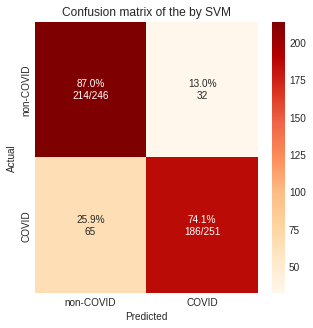

Bilgi: (1984, 1000) 1984
Acc ResNet50-LR score: 68.2
Confusion Matrix:
[[189  57]
 [101 150]]
by LR  Algoritması  ResNet50  Dataset, Acc: 68.21 Sen: 59.76  Spe: 76.83  Pre: 72.46  F1-score: 65.5


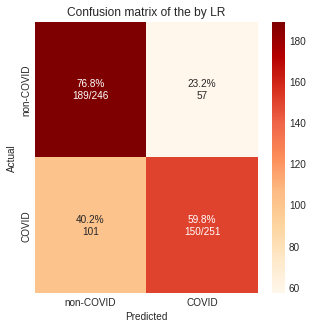

Bilgi: (1984, 1000) 1984
Acc ResNet50-XGBoost score: 90.9
Confusion Matrix:
[[227  19]
 [ 26 225]]
by XGBoost  Algoritması  ResNet50  Dataset, Acc: 90.95 Sen: 89.64  Spe: 92.28  Pre: 92.21  F1-score: 90.91


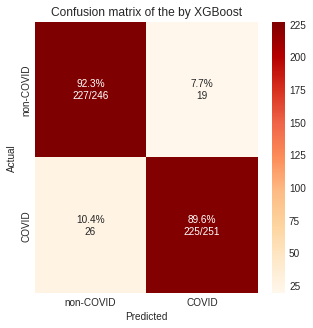

Bilgi: (1984, 1000) 1984
Acc ResNet50-GradientBoost score: 88.7
Confusion Matrix:
[[224  22]
 [ 34 217]]
by GradientBoost  Algoritması  ResNet50  Dataset, Acc: 88.73 Sen: 86.45  Spe: 91.06  Pre: 90.79  F1-score: 88.57


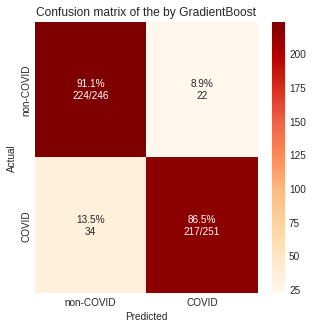

##########################


In [ ]:
from google.colab import drive
import numpy as np
from imblearn.over_sampling import SMOTE,RandomOverSampler
from imblearn.combine import SMOTETomek
import pickle
import warnings
from collections import Counter
from numpy import where
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import joblib
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

basarilar=[]

def perf_measure(cm,alg_name,etiket):
    
    print ("Confusion Matrix:")
    print (cm)
    TN = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TP = cm[1][1]
    
    acc= round(float(TP+TN)/(TP+TN+FP+FN)*100,2)
    sensitivity = round(float(TP) / (TP + FN)*100,2)
    specificity =round(float(TN )/ (FP + TN)*100,2)
    precision=round(float(TP )/ (TP + FP)*100,2)
    F1_score=round(2/((1/sensitivity)+(1/precision)),2)
    print (alg_name," Algoritması ",etiket," Dataset, Acc:",acc, "Sen:",sensitivity," Spe:",specificity," Pre:",precision," F1-score:",F1_score)
    basarilar.append([alg_name,etiket,acc,sensitivity,specificity,precision,F1_score])

def cm_analysis(y_true, y_pred,etiket, labels, alg_name,figsize2=(5,5)):

    cm = confusion_matrix(y_true, y_pred, labels=labels)
    perf_measure(cm,alg_name,etiket)

    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)

    labels2=['non-COVID','COVID']
    
    cm = pd.DataFrame(cm, index=labels2, columns=labels2)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize2)
    sns.heatmap(cm, cmap="OrRd",annot=annot, fmt='', ax=ax)
    #plt.savefig(filename)
    plt.title('Confusion matrix of the '+alg_name)
    plt.show()

def class_bilgi(y,etiket):
    print (etiket, "bilgisi")
    t=0
    for class_code in range(0,7):
        s=0
        for value in y:
            if value==class_code:
                s+=1
                
        print ("Class no:",class_code," sayısı:",s)
        t+=s
    
    print ("Toplam:",t)

warnings.filterwarnings("ignore")

def plot_ciz(X_new,y_new,counter):
  # scatter plot of examples by class label
  for label, _ in counter.items():
    row_ix = where(y_new == label)[0]
    pyplot.scatter(X_new[row_ix, 0], X_new[row_ix, 1], label=str(label))
  pyplot.legend()
  pyplot.show()



def func_siniflandir(x_train,y_train,x_test,y_test,etiket):
    
    labels=[0,1]    
    alg_lists=['SVM','LR','XGBoost','GradientBoost']

    for i,clf in enumerate([svm.SVC(),LogisticRegression(), XGBClassifier(), GradientBoostingClassifier()]):
      print ("Bilgi:",x_train.shape,len(y_train))

      clf.fit(x_train,y_train)
      results = clf.predict(x_test)
      acc=round(accuracy_score(y_test, results),3)
      print ("Acc "+etiket+"-"+alg_lists[i]+ " score:",acc*100)
      #joblib.dump(clf,anaKlasor+"/pretrained_features/"+etiket+".pkl")
      cm_analysis(y_test, results, etiket,labels, "by "+alg_lists[i],figsize2=(5,5))


drive.mount('/content/drive')
main_path =  "/content/drive/MyDrive/tez/"
label="ResNet101"

etiket="ResNet101"
X=np.load(main_path+"/pretrained_features/"+label+"_features.npy")
y=np.load(main_path+"/pretrained_features/"+label+"_output.npy")
print (X.shape)

#X=X.reshape(X.shape[2])
X = X.reshape(X.shape[0], -1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state=42)

func_siniflandir(x_train,y_train,x_test,y_test,etiket)
#plot_ciz(X, y,counter)
print ("##########################")

In [ ]:
X=np.concatenate((VGG16,ResNet50),axis=1)
y=np.load(main_path+"/pretrained_features/"+label+"_output.npy")

ValueError: ignored